In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

path = r'/content/drive/MyDrive/final data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    dtype_dic= { 'Art - FDIR (kode)':str, 'Art - gruppe (kode)':str, 'Art - hovedgruppe (kode)':str, 'Fangstfelt (kode)':str}
    df = pd.read_csv(filename, index_col=None, header=0,dtype = dtype_dic)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
frame.shape

(21773141, 21)

In [4]:
frame.head(10)

,Unnamed: 0,Fartøy ID,Største lengde,Motorkraft,Bruttotonnasje annen,Redskap (kode),Fartøykommune (kode),Art - FDIR (kode),Art - gruppe (kode),Art - hovedgruppe (kode),Landingskommune (kode),Siste fangstdato,Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),Produktvekt,tonnage_length_ratio,log_length,log_tonnage
0,0,1.995004e+09,8.31,22.0,5.333567,33.0,1548.0,1032,0203,02,9990.0,2001-08-05,80719,8.0,6.5,63.25,211.0,269.0,0.641825,2.117460,1.674020
1,1,1.995004e+09,8.31,22.0,5.333567,33.0,1548.0,1032,0203,02,9990.0,2001-08-05,80719,8.0,6.5,63.25,210.0,6.0,0.641825,2.117460,1.674020
2,2,1.995004e+09,8.31,22.0,5.333567,33.0,1548.0,1022,0201,02,9990.0,2001-08-05,80719,8.0,6.5,63.25,211.0,4.0,0.641825,2.117460,1.674020
3,3,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1022,0201,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,8.0,0.705882,2.140066,1.791759
4,4,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1022,0201,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,7.5,0.705882,2.140066,1.791759
5,5,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1034,0220,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,13.0,0.705882,2.140066,1.791759
6,6,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1032,0203,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,0.5,0.705882,2.140066,1.791759
7,7,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1032,0203,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,6.0,0.705882,2.140066,1.791759
8,8,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1027,0202,02,211.0,2001-09-21,80920,8.0,10.5,59.25,210.0,0.5,0.705882,2.140066,1.791759
9,9,2.000014e+09,8.50,120.0,6.000000,21.0,136.0,1032,0203,02,211.0,2001-11-14,80920,8.0,10.5,59.25,210.0,3.0,0.705882,2.140066,1.791759


there are 151 unique ocations outside 20 nautical miles range.

In [5]:
frame[frame['Kyst/hav (kode)'] == 8]['Fangstfelt (kode)'].nunique()

151

there are 1069 unique ocations within 20 nautical miles range.

In [6]:
frame[frame['Kyst/hav (kode)'] == 0]['Fangstfelt (kode)'].nunique()

1069

## problem: out of 21 million entries 1 million entries have product weight equal to zero inspite of all other info

In [7]:
len(frame[frame['Produktvekt'] == 0])

1008687

## since we cannot do much about these entries we remove them

In [8]:
# get names of indexes for which
# column product weight has value 0
index_names = frame[ frame['Produktvekt'] == 0 ].index
  
# drop these row indexes
# from dataFrame
frame.drop(index_names, inplace = True)
  
frame.shape

(20764454, 21)

In [9]:
len(frame[frame['Produktvekt'] == 0])

0

In [10]:
frame.corr()

,Unnamed: 0,Fartøy ID,Største lengde,Motorkraft,Bruttotonnasje annen,Redskap (kode),Fartøykommune (kode),Landingskommune (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),Produktvekt,tonnage_length_ratio,log_length,log_tonnage
Unnamed: 0,1.000000,-0.066937,-0.036736,-0.037897,-0.037174,0.101431,-0.268612,-0.251328,-0.051723,-0.356478,-0.350802,0.015981,-0.014318,-0.037762,-0.034901,-0.029523
Fartøy ID,-0.066937,1.000000,0.074051,0.164608,0.122389,0.045089,0.065348,0.059695,-0.062873,0.009712,-0.035219,-0.049699,0.031442,0.139562,0.031686,0.073388
Største lengde,-0.036736,0.074051,1.000000,0.887079,0.798970,0.250568,-0.003486,0.057913,-0.558868,-0.025769,0.044183,-0.012725,0.282394,0.884492,0.931152,0.912331
Motorkraft,-0.037897,0.164608,0.887079,1.000000,0.869663,0.182735,0.011118,0.051223,-0.478958,-0.022411,0.042715,-0.026603,0.308630,0.892433,0.735076,0.729311
Bruttotonnasje annen,-0.037174,0.122389,0.798970,0.869663,1.000000,0.112416,0.016323,0.038929,-0.406705,-0.027633,0.041514,-0.018617,0.280078,0.970286,0.602099,0.611075
Redskap (kode),0.101431,0.045089,0.250568,0.182735,0.112416,1.000000,-0.197348,-0.132641,-0.152638,-0.068151,-0.273779,-0.110841,-0.008090,0.179882,0.302752,0.316418
Fartøykommune (kode),-0.268612,0.065348,-0.003486,0.011118,0.016323,-0.197348,1.000000,0.634768,0.021565,0.367133,0.493891,0.050061,-0.006449,0.014892,-0.012580,-0.015627
Landingskommune (kode),-0.251328,0.059695,0.057913,0.051223,0.038929,-0.132641,0.634768,1.000000,-0.098478,0.269478,0.336504,0.024803,0.026697,0.047951,0.053763,0.049004
Kyst/hav (kode),-0.051723,-0.062873,-0.558868,-0.478958,-0.406705,-0.152638,0.021565,-0.098478,1.000000,0.102680,0.048401,-0.007301,-0.136437,-0.474675,-0.523402,-0.514927
Lon (lokasjon),-0.356478,0.009712,-0.025769,-0.022411,-0.027633,-0.068151,0.367133,0.269478,0.102680,1.000000,0.810852,0.028023,-0.064464,-0.027169,-0.009826,-0.014446


In [11]:
frame.dtypes

Unnamed: 0                    int64
Fartøy ID                   float64
Største lengde              float64
Motorkraft                  float64
Bruttotonnasje annen        float64
Redskap (kode)              float64
Fartøykommune (kode)        float64
Art - FDIR (kode)            object
Art - gruppe (kode)          object
Art - hovedgruppe (kode)     object
Landingskommune (kode)      float64
Siste fangstdato             object
Fangstfelt (kode)            object
Kyst/hav (kode)             float64
Lon (lokasjon)              float64
Lat (lokasjon)              float64
Produkttilstand (kode)      float64
Produktvekt                 float64
tonnage_length_ratio        float64
log_length                  float64
log_tonnage                 float64
dtype: object

## correct the date column format

In [12]:
frame['Siste fangstdato'].dtype

dtype('O')

In [13]:
frame['Siste fangstdato'] = pd.to_datetime(frame['Siste fangstdato'])

In [14]:
frame['Siste fangstdato'].dtype

dtype('<M8[ns]')

In [15]:
frame['Siste fangstdato'].head(10)

0   2001-08-05
1   2001-08-05
2   2001-08-05
3   2001-09-21
4   2001-09-21
5   2001-09-21
6   2001-09-21
7   2001-09-21
8   2001-09-21
9   2001-11-14
Name: Siste fangstdato, dtype: datetime64[ns]

In [16]:
frame.dtypes

Unnamed: 0                           int64
Fartøy ID                          float64
Største lengde                     float64
Motorkraft                         float64
Bruttotonnasje annen               float64
Redskap (kode)                     float64
Fartøykommune (kode)               float64
Art - FDIR (kode)                   object
Art - gruppe (kode)                 object
Art - hovedgruppe (kode)            object
Landingskommune (kode)             float64
Siste fangstdato            datetime64[ns]
Fangstfelt (kode)                   object
Kyst/hav (kode)                    float64
Lon (lokasjon)                     float64
Lat (lokasjon)                     float64
Produkttilstand (kode)             float64
Produktvekt                        float64
tonnage_length_ratio               float64
log_length                         float64
log_tonnage                        float64
dtype: object

## Adding a year column and a month column so that we can remove the exact date column(Siste fangstdato) and convert month to specific seasons

In [17]:
frame['year'] = pd.DatetimeIndex(frame['Siste fangstdato']).year

In [18]:
frame['month'] = pd.DatetimeIndex(frame['Siste fangstdato']).month

In [19]:
frame.dtypes

Unnamed: 0                           int64
Fartøy ID                          float64
Største lengde                     float64
Motorkraft                         float64
Bruttotonnasje annen               float64
Redskap (kode)                     float64
Fartøykommune (kode)               float64
Art - FDIR (kode)                   object
Art - gruppe (kode)                 object
Art - hovedgruppe (kode)            object
Landingskommune (kode)             float64
Siste fangstdato            datetime64[ns]
Fangstfelt (kode)                   object
Kyst/hav (kode)                    float64
Lon (lokasjon)                     float64
Lat (lokasjon)                     float64
Produkttilstand (kode)             float64
Produktvekt                        float64
tonnage_length_ratio               float64
log_length                         float64
log_tonnage                        float64
year                                 int64
month                                int64
dtype: obje

In [20]:
# frame.to_csv('complete_data.csv')

## for the model we analyse certain columns

In [21]:
df_model = frame[['Største lengde','Redskap (kode)','Art - FDIR (kode)', 'Fangstfelt (kode)', 'Kyst/hav (kode)','Lon (lokasjon)','Lat (lokasjon)','Produkttilstand (kode)','month','Produktvekt']]

In [22]:
df_model.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),month,Produktvekt
0,8.31,33.0,1032,80719,8.0,6.5,63.25,211.0,8,269.0
1,8.31,33.0,1032,80719,8.0,6.5,63.25,210.0,8,6.0
2,8.31,33.0,1022,80719,8.0,6.5,63.25,211.0,8,4.0
3,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,8.0
4,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,7.5
5,8.50,21.0,1034,80920,8.0,10.5,59.25,210.0,9,13.0
6,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,0.5
7,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,6.0
8,8.50,21.0,1027,80920,8.0,10.5,59.25,210.0,9,0.5
9,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,11,3.0


In [23]:
df_model.shape

(20764454, 10)

## Since we are creating a model for very small vessels (length < 10m) we take that subset of data

In [24]:
len(df_model[df_model['Største lengde'] < 10])

6276647

In [25]:
df_model_very_small = df_model[df_model['Største lengde'] < 10]
df_model_very_small.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),month,Produktvekt
0,8.31,33.0,1032,80719,8.0,6.5,63.25,211.0,8,269.0
1,8.31,33.0,1032,80719,8.0,6.5,63.25,210.0,8,6.0
2,8.31,33.0,1022,80719,8.0,6.5,63.25,211.0,8,4.0
3,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,8.0
4,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,7.5
5,8.50,21.0,1034,80920,8.0,10.5,59.25,210.0,9,13.0
6,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,0.5
7,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,9,6.0
8,8.50,21.0,1027,80920,8.0,10.5,59.25,210.0,9,0.5
9,8.50,21.0,1032,80920,8.0,10.5,59.25,210.0,11,3.0


## for this moment we are just focussing on one particular species:TORSK - we just need to do for a particular species - torsk (ART-FDIR CODE = 1022,102201,102202,102204)

In [26]:
df_1022 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '1022']
df_102201 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '102201']
df_102202 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '102202']
df_102204 = df_model_very_small[df_model_very_small['Art - FDIR (kode)'] == '102204']

pdList = [df_1022,df_102201, df_102202,df_102204]  
df_model_torsk = pd.concat(pdList)

## torsk - very_small model dataframe

In [27]:
df_model_torsk.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),month,Produktvekt
2,8.31,33.0,1022,80719,8.0,6.5,63.25,211.0,8,4.0
3,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,8.0
4,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,7.5
25,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,11,4.0
26,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,11,4.0
27,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,11,8.0
33,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,9,2.5
34,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,3,15.0
35,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,3,8.0
36,8.50,21.0,1022,80920,8.0,10.5,59.25,210.0,3,7.0


In [28]:
df_model_torsk.shape

(2363304, 10)

As we can see that the range of target is quite dispersed , whereas the range of length is just l < 10m

In [29]:
df_model_torsk['Produktvekt'].min()

0.1

In [30]:
df_model_torsk['Produktvekt'].max()

11704.0

In [31]:
df_model_torsk['Produktvekt'].describe()

count    2.363304e+06
mean     1.268282e+02
std      2.531986e+02
min      1.000000e-01
25%      1.200000e+01
50%      4.000000e+01
75%      1.230000e+02
max      1.170400e+04
Name: Produktvekt, dtype: float64

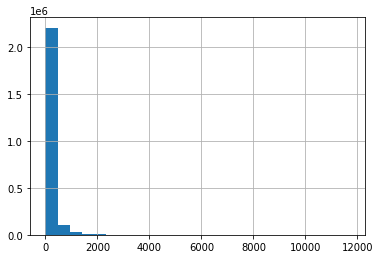

In [32]:
df_model_torsk['Produktvekt'].hist(bins = 25)

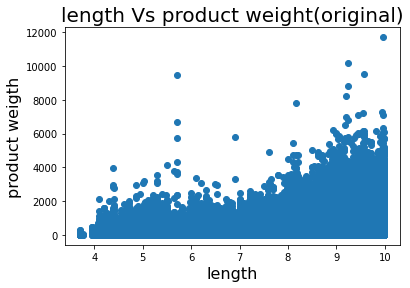

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

## Handling noise

In [34]:
df_model_torsk['gear_code_frequency'] = df_model_torsk['Redskap (kode)'].map(df_model_torsk['Redskap (kode)'].value_counts())
df_model_torsk['product_condition_code_frequency'] = df_model_torsk['Produkttilstand (kode)'].map(df_model_torsk['Produkttilstand (kode)'].value_counts())

filtering on the basis of gear frequency - contain those with >= 1000 occurences.

filtering on the basis of product condition code frequency - contain those with >= 1000 occurences.

In [35]:
df_model_torsk = df_model_torsk[df_model_torsk['gear_code_frequency'] >= 1000]
df_model_torsk = df_model_torsk[df_model_torsk['product_condition_code_frequency'] >= 1000]

In [36]:
df_model_torsk = df_model_torsk[['Største lengde', 'Redskap (kode)', 'gear_code_frequency', 'Art - FDIR (kode)', 'Fangstfelt (kode)', 'Kyst/hav (kode)', 'Lon (lokasjon)', 'Lat (lokasjon)',  'Produkttilstand (kode)', 'product_condition_code_frequency', 'month', 'Produktvekt']]
df_model_torsk

,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt
2,8.31,33.0,931434,1022,80719,8.0,6.50000,63.25000,211.0,1531404,8,4.0
3,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,9,8.0
4,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,9,7.5
25,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,4.0
26,8.50,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,9,23.0
21679626,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,65.0
21679628,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,48.1
21679633,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,10,30.0


In [37]:
## l < 9.9' - very_small
## '10-14.9' - small
## 15-20.9 - medium
## 21-27.9 - large
## l > 28 - very_large

distribution_catch = {'catch range':['x <= 10','x <= 2000', '2000 < x <= 4000', '4000 < x <= 6000', '6000 < x <= 8000','8000 < x <= 10000', '10000 < x <= 12000'],
        'Count':[len(df_model_torsk[(df_model_torsk['Produktvekt'] <= 10)]),
                 len(df_model_torsk[(df_model_torsk['Produktvekt'] <= 2000)]),
                len(df_model_torsk[(2000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 4000)]),
                 len(df_model_torsk[(4000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 6000)]),
                len(df_model_torsk[(6000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 8000)]),
                 len(df_model_torsk[(8000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 10000)]),
                 len(df_model_torsk[(10000 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 12000)]),
                #  len(frame[( <= df_model_torsk['Produktvekt'])])
                ]}
  
# Create DataFrame
df_catch = pd.DataFrame(distribution_catch)
df_catch

,catch range,Count
0,x <= 10,522531
1,x <= 2000,2353293
2,2000 < x <= 4000,5300
3,4000 < x <= 6000,296
4,6000 < x <= 8000,20
5,8000 < x <= 10000,3
6,10000 < x <= 12000,2


as we see that the distribution is quite dispersed , making certain ranges act like a outlier(noise).

we need to remove '0', '3', '4', '5', '6'

essentially we just need catch from 10kg to 4000kg

In [38]:
df_model_torsk = df_model_torsk[(10 < df_model_torsk['Produktvekt']) & (df_model_torsk['Produktvekt'] <= 4000)]
df_model_torsk

,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt
34,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,3,15.0
45,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,15.0
51,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,15.0
85,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,210.0,276208,11,12.5
89,8.5,21.0,1095,1022,80920,8.0,10.50000,59.25000,100.0,33011,5,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,9,23.0
21679626,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,65.0
21679628,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,48.1
21679633,7.9,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,10,30.0


In [39]:
df_model_torsk['Fangstfelt (kode)'].nunique()

239

In [40]:
df_model_torsk['Produktvekt'].describe()

count    1.836062e+06
mean     1.606215e+02
std      2.701166e+02
min      1.010000e+01
25%      2.800000e+01
50%      6.400000e+01
75%      1.690000e+02
max      4.000000e+03
Name: Produktvekt, dtype: float64

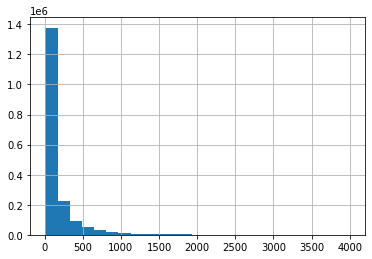

In [41]:
df_model_torsk['Produktvekt'].hist(bins = 25)

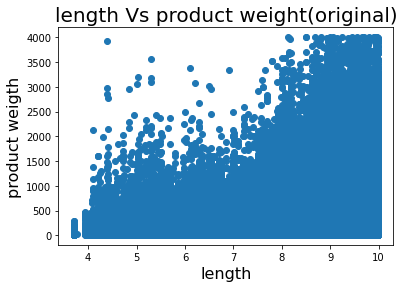

In [42]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

## Dividing the model into north and south

In [43]:
lat = df_model_torsk['Lat (lokasjon)'].values
lon = df_model_torsk['Lon (lokasjon)'].values

In [44]:
print(max(lat))
print(min(lat))
print(max(lon))
print(min(lon))

71.75
56.25
41.0
-21.5


## we need to divide the data into 2 parts , for north and for south

North: (63.75 N, 71.25 N)

South: (56.25 N, 63.75 N)

first we do for north region - (63.75N, 71.25N)

In [45]:
df_model_torsk = df_model_torsk[(63.75 < df_model_torsk['Lat (lokasjon)'])]
df_model_torsk 

,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt
245388,9.45,61.0,17071,1022,80306,8.0,29.42593,70.64198,210.0,276208,5,23.0
3581135,8.96,61.0,17071,1022,80708,8.0,8.48140,63.76938,210.0,276208,1,113.0
3581136,8.96,61.0,17071,1022,80708,8.0,8.48140,63.76938,210.0,276208,1,100.0
5260544,9.76,22.0,1048948,1022,00509,0.0,12.38605,67.80045,211.0,1531404,3,3642.0
5980924,8.60,20.0,63971,1022,80634,8.0,13.76496,66.21768,110.0,147677,6,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,9,23.0
21679626,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,65.0
21679628,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,48.1
21679633,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,10,30.0


In [46]:
df_model_torsk['Fangstfelt (kode)'].nunique()

151

In [47]:
lat_north = df_model_torsk['Lat (lokasjon)'].values
lon_north = df_model_torsk['Lon (lokasjon)'].values

In [48]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

In [49]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759605 sha256=7460dfbd6ff810b682900562985b909853ab1b87d6d078e15af39917cfcb286a
  Stored in directory: /tmp/pip-ephem-wheel-cache-8712zve_/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [50]:
!pip install pyproj==1.9.6

In [51]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

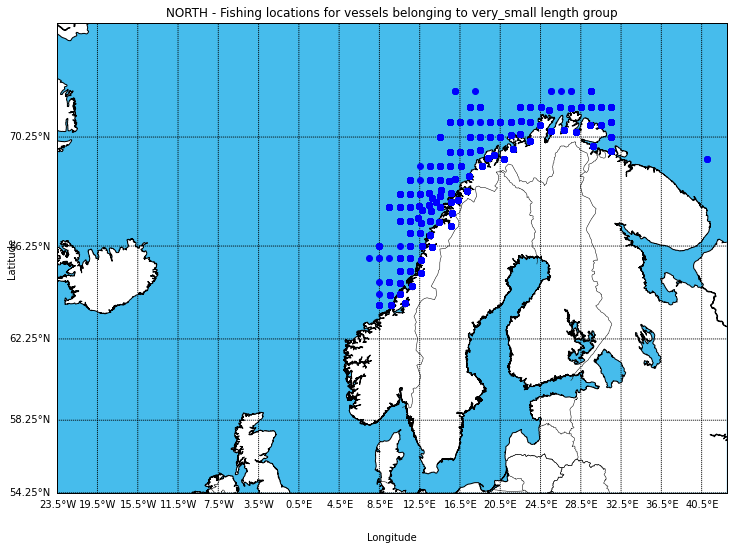

In [52]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m1 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m1.drawcoastlines()
m1.drawcountries()
m1.drawstates()
m1.drawmapboundary(fill_color='#46bcec')
m1.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m1(lon_north, lat_north)
# plot points as blue dots
m1.scatter(lons, lats, marker = 'o', color='b', zorder=5)
#plt.legend()
plt.title("NORTH - Fishing locations for vessels belonging to very_small length group")
#drawing grid lines
m1.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m1.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

one abnormal location

In [53]:
# abnormal_location = df_model_torsk[(62.25 < df_model_torsk['Lat (lokasjon)']) & (df_model_torsk['Lon (lokasjon)'] < -19.5)]
# abnormal_location 

## 8 - within 20 nautical miles of the coast 

## 0 - outside 20 nautical miles of the coast

In [54]:
df_model_torsk['Kyst/hav (kode)'].value_counts()

8.0    1552751
0.0      51029
Name: Kyst/hav (kode), dtype: int64

In [55]:
lat_kyst_8 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 8]['Lat (lokasjon)'].values
lon_kyst_8 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 8]['Lon (lokasjon)'].values

lat_kyst_0 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 0]['Lat (lokasjon)'].values
lon_kyst_0 = df_model_torsk[df_model_torsk['Kyst/hav (kode)'] == 0]['Lon (lokasjon)'].values


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


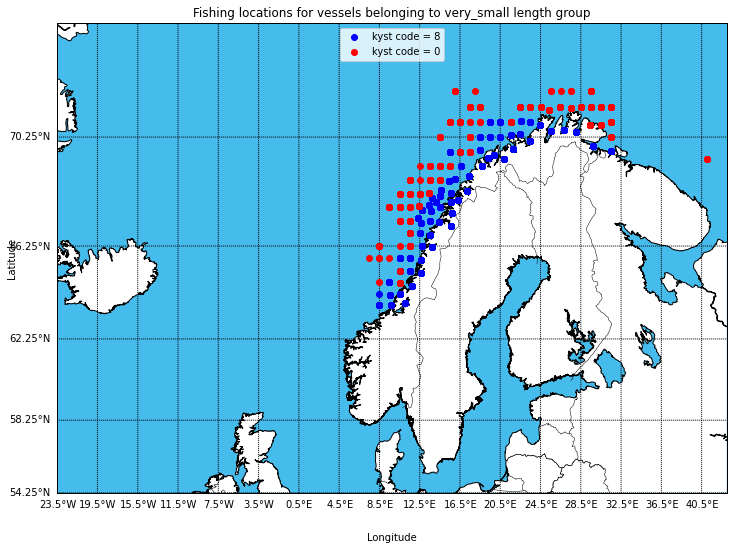

In [56]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m2 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m2.drawcoastlines()
m2.drawcountries()
m2.drawstates()
m2.drawmapboundary(fill_color='#46bcec')
m2.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_kyst_8, lats_kyst_8 = m2(lon_kyst_8, lat_kyst_8)
lons_kyst_0, lats_kyst_0 = m2(lon_kyst_0, lat_kyst_0)

# plot points as blue dots - kyst = 8
m2.scatter(lons_kyst_8, lats_kyst_8, marker = 'o', color='b', zorder=5, label = 'kyst code = 8')
# plot points as red dots - kyst = 0
m2.scatter(lons_kyst_0,lats_kyst_0, marker = 'o', color='r', zorder=5, label = 'kyst code = 0')

plt.legend()
plt.title("Fishing locations for vessels belonging to very_small length group")
#drawing grid lines
m2.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m2.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

## We will create an extra feature of haversine distance based on latitude and longitude

since tree based algorithm work on individual columns we cannot expexct it to take the combination of (lat, lon), hence we create the feature of haversine distance which is the distance between any two points on sphere

In [57]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

In [58]:
df_model_torsk['harvesine_distance'] = [single_pt_haversine(x, y) for x, y in zip(df_model_torsk['Lat (lokasjon)'], df_model_torsk['Lon (lokasjon)'])]
df_model_torsk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Største lengde,Redskap (kode),gear_code_frequency,Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),Produkttilstand (kode),product_condition_code_frequency,month,Produktvekt,harvesine_distance
245388,9.45,61.0,17071,1022,80306,8.0,29.42593,70.64198,210.0,276208,5,23.0,8141.626523
3581135,8.96,61.0,17071,1022,80708,8.0,8.48140,63.76938,210.0,276208,1,113.0,7125.116641
3581136,8.96,61.0,17071,1022,80708,8.0,8.48140,63.76938,210.0,276208,1,100.0,7125.116641
5260544,9.76,22.0,1048948,1022,00509,0.0,12.38605,67.80045,211.0,1531404,3,3642.0,7599.463996
5980924,8.60,20.0,63971,1022,80634,8.0,13.76496,66.21768,110.0,147677,6,231.0,7443.482847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,9,23.0,7136.684707
21679626,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,65.0,7136.684707
21679628,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,2,48.1,7136.684707
21679633,7.90,22.0,1048948,102202,80725,8.0,9.61139,63.78643,211.0,1531404,10,30.0,7136.684707


In [59]:
df_model_torsk = df_model_torsk[['Største lengde', 'Redskap (kode)', 'Art - FDIR (kode)', 'Fangstfelt (kode)', 'Kyst/hav (kode)', 'Lon (lokasjon)', 'Lat (lokasjon)', 'harvesine_distance', 'Produkttilstand (kode)', 'month', 'Produktvekt']]
df_model_torsk

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
245388,9.45,61.0,1022,80306,8.0,29.42593,70.64198,8141.626523,210.0,5,23.0
3581135,8.96,61.0,1022,80708,8.0,8.48140,63.76938,7125.116641,210.0,1,113.0
3581136,8.96,61.0,1022,80708,8.0,8.48140,63.76938,7125.116641,210.0,1,100.0
5260544,9.76,22.0,1022,00509,0.0,12.38605,67.80045,7599.463996,211.0,3,3642.0
5980924,8.60,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,110.0,6,231.0
...,...,...,...,...,...,...,...,...,...,...,...
21679619,7.90,22.0,102202,80725,8.0,9.61139,63.78643,7136.684707,211.0,9,23.0
21679626,7.90,22.0,102202,80725,8.0,9.61139,63.78643,7136.684707,211.0,2,65.0
21679628,7.90,22.0,102202,80725,8.0,9.61139,63.78643,7136.684707,211.0,2,48.1
21679633,7.90,22.0,102202,80725,8.0,9.61139,63.78643,7136.684707,211.0,10,30.0


## length vs product weight

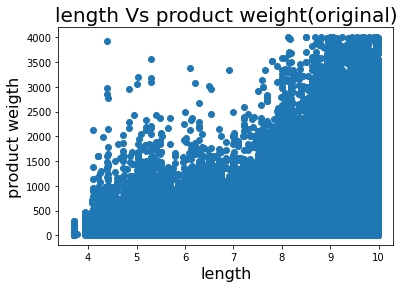

In [60]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

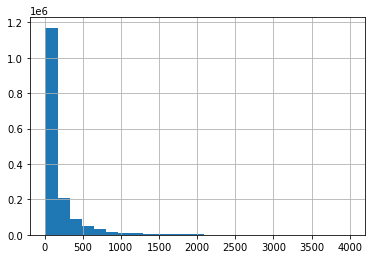

In [61]:
target_distribution =  df_model_torsk['Produktvekt'].hist(bins=25)

AS we see the range of targets is quite high hence we try to normalize it using logarithm function

In [62]:
df_model_torsk['Produktvekt'].describe()

count    1.603780e+06
mean     1.728765e+02
std      2.824301e+02
min      1.010000e+01
25%      3.000000e+01
50%      7.000000e+01
75%      1.862000e+02
max      4.000000e+03
Name: Produktvekt, dtype: float64

In [63]:
import numpy as np
np.log(df_model_torsk['Produktvekt'].min())

2.312535423847214

In [64]:
df_model_torsk[df_model_torsk['Produktvekt'] == df_model_torsk['Produktvekt'].min()]

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
11066067,9.33,22.0,102202,80638,8.0,10.50072,64.25083,7195.729916,211.0,8,10.1
11066277,7.70,22.0,102202,80638,8.0,10.50072,64.25083,7195.729916,211.0,4,10.1
11676772,7.85,22.0,102202,80633,8.0,12.68927,66.25914,7435.959788,641.0,2,10.1
12088169,7.35,22.0,102202,80638,8.0,10.50072,64.25083,7195.729916,211.0,3,10.1
16089481,9.97,33.0,102202,80638,8.0,10.50072,64.25083,7195.729916,211.0,6,10.1
19617941,7.75,33.0,102202,80520,8.0,14.56401,68.75918,7725.054263,211.0,4,10.1
19636155,8.81,33.0,102202,00515,0.0,13.44548,68.29821,7663.761204,110.0,5,10.1
19801362,6.90,22.0,102202,80638,8.0,10.50072,64.25083,7195.729916,211.0,4,10.1
20603440,6.90,22.0,102202,80638,8.0,10.50072,64.25083,7195.729916,211.0,3,10.1
21388424,9.40,22.0,102202,80046,8.0,14.56579,68.15924,7660.823182,211.0,10,10.1


Normalizing using logarithmic transformation

In [65]:
df_model_torsk['Produktvekt']  = np.log(df_model_torsk['Produktvekt'])/df_model_torsk['Største lengde'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_model_torsk.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
245388,9.45,61.0,1022,80306,8.0,29.42593,70.64198,8141.626523,210.0,5,0.331798
3581135,8.96,61.0,1022,80708,8.0,8.48140,63.76938,7125.116641,210.0,1,0.527610
3581136,8.96,61.0,1022,80708,8.0,8.48140,63.76938,7125.116641,210.0,1,0.513970
5260544,9.76,22.0,1022,00509,0.0,12.38605,67.80045,7599.463996,211.0,3,0.840193
5980924,8.60,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,110.0,6,0.632839
5980925,8.60,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,110.0,6,0.348341
10538094,8.99,20.0,1022,00610,0.0,8.50000,64.75000,7232.836106,110.0,3,0.443713
13638499,9.00,20.0,1022,80708,8.0,8.48140,63.76938,7125.116641,211.0,5,0.266433
13665889,9.45,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,211.0,3,0.538370
16731956,7.70,20.0,1022,80310,8.0,26.46578,71.23915,8146.910607,110.0,3,0.859750


Now the distribution of targets is quite small range

In [67]:
df_model_torsk['Produktvekt'].describe()

count    1.603780e+06
mean     5.218588e-01
std      1.600461e-01
min      2.319494e-01
25%      4.015467e-01
50%      5.025685e-01
75%      6.189236e-01
max      1.885457e+00
Name: Produktvekt, dtype: float64

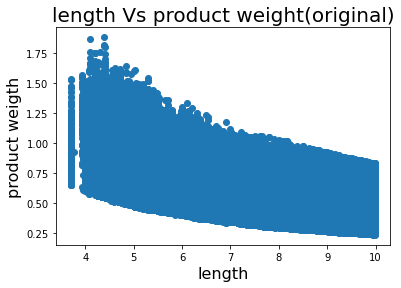

In [68]:
import matplotlib.pyplot as plt
plt.scatter(df_model_torsk['Største lengde'], df_model_torsk['Produktvekt'])
plt.title("length Vs product weight(original)", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('product weigth', fontsize=16)
plt.show()

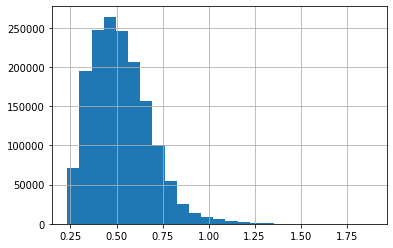

In [69]:
transformed_target_distribution =  df_model_torsk['Produktvekt'].hist(bins=25)

In [70]:
# df_model_torsk = df_model_torsk.reset_index()
# df_model_torsk = df_model_torsk.drop(['index'], axis = 1)

In [71]:
df_model_torsk.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
245388,9.45,61.0,1022,80306,8.0,29.42593,70.64198,8141.626523,210.0,5,0.331798
3581135,8.96,61.0,1022,80708,8.0,8.48140,63.76938,7125.116641,210.0,1,0.527610
3581136,8.96,61.0,1022,80708,8.0,8.48140,63.76938,7125.116641,210.0,1,0.513970
5260544,9.76,22.0,1022,00509,0.0,12.38605,67.80045,7599.463996,211.0,3,0.840193
5980924,8.60,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,110.0,6,0.632839
5980925,8.60,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,110.0,6,0.348341
10538094,8.99,20.0,1022,00610,0.0,8.50000,64.75000,7232.836106,110.0,3,0.443713
13638499,9.00,20.0,1022,80708,8.0,8.48140,63.76938,7125.116641,211.0,5,0.266433
13665889,9.45,20.0,1022,80634,8.0,13.76496,66.21768,7443.482847,211.0,3,0.538370
16731956,7.70,20.0,1022,80310,8.0,26.46578,71.23915,8146.910607,110.0,3,0.859750


In [72]:
df_model_torsk['Største lengde'].mean()

8.552181371499193

In [73]:
df_model_torsk.dtypes

Største lengde            float64
Redskap (kode)            float64
Art - FDIR (kode)          object
Fangstfelt (kode)          object
Kyst/hav (kode)           float64
Lon (lokasjon)            float64
Lat (lokasjon)            float64
harvesine_distance        float64
Produkttilstand (kode)    float64
month                       int64
Produktvekt               float64
dtype: object

In [74]:
# df_model_torsk[df_model_torsk['Produktvekt'] == 0]

## defining X(independent variables) and y(dependent variable - log(productvekt)/vessel length)

In [75]:
X = df_model_torsk[['Største lengde','Redskap (kode)', 'Art - FDIR (kode)', 'Kyst/hav (kode)','Lon (lokasjon)','Lat (lokasjon)', 'harvesine_distance', 'Produkttilstand (kode)','month']]
y = df_model_torsk[['Produktvekt']]

In [76]:
print(X.shape)
print(y.shape)

(1603780, 9)
(1603780, 1)


## dividing into train/validation and test sets. first divide into test and train and then divide train into train and validation. we use stratify parameter to ensure that the species code have been divided proportionaltely into the train , validation and test sets.

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = X['Art - FDIR (kode)'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify = X_train['Art - FDIR (kode)']) # 0.25 x 0.8 = 0.2

In [78]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(962268, 9)
(320756, 9)
(320756, 9)
(962268, 1)
(320756, 1)
(320756, 1)


In [79]:
# y_test[y_test['Produktvekt'] == 0]

In [80]:
X_train['Art - FDIR (kode)'].value_counts()

102202    916558
102201     45703
1022           7
Name: Art - FDIR (kode), dtype: int64

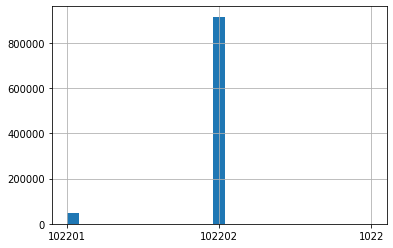

In [81]:
X_train['Art - FDIR (kode)'].hist(bins=25)

In [82]:
X_val['Art - FDIR (kode)'].value_counts()

102202    305519
102201     15234
1022           3
Name: Art - FDIR (kode), dtype: int64

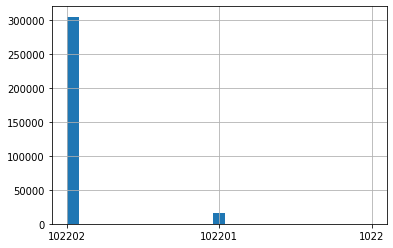

In [83]:
X_val['Art - FDIR (kode)'].hist(bins=25)

In [84]:
X_test['Art - FDIR (kode)'].value_counts()

102202    305519
102201     15235
1022           2
Name: Art - FDIR (kode), dtype: int64

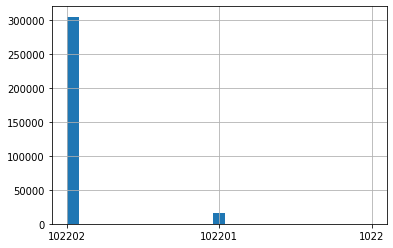

In [85]:
X_test['Art - FDIR (kode)'].hist(bins=25)

## before fitting train data to the model we need one hot encode the species code as it is not a numeric but string

In [86]:
X_train = pd.get_dummies(X_train, columns=['Art - FDIR (kode)'])

In [87]:
X_val = pd.get_dummies(X_val, columns=['Art - FDIR (kode)'])

In [88]:
X_test = pd.get_dummies(X_test, columns=['Art - FDIR (kode)'])

In [89]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(962268, 11)
(320756, 11)
(320756, 11)


In [90]:
# X_train.columns = ['length']
X_train = X_train.rename({'Største lengde': 'length'}, axis=1)

In [91]:
# X_train.columns = ['length']
X_val = X_val.rename({'Største lengde': 'length'}, axis=1)

In [92]:
# X_train.columns = ['length']
X_test = X_test.rename({'Største lengde': 'length'}, axis=1)

## just overview

In [93]:
X_train.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102201,Art - FDIR (kode)_102202
347902,9.45,33.0,8.0,13.44548,68.29821,7663.761204,642.0,3,0,1,0
18828161,9.25,32.0,8.0,14.50000,69.25000,7776.959381,110.0,11,0,0,1
1907585,7.90,33.0,8.0,17.49100,69.74206,7863.346644,641.0,4,0,0,1
10786131,9.04,22.0,8.0,12.33333,67.33333,7548.407398,211.0,3,0,0,1
4246805,8.90,22.0,8.0,19.50000,70.25000,7942.174377,211.0,9,0,0,1
15174480,9.30,33.0,8.0,15.50000,69.75000,7841.120617,211.0,1,0,0,1
17774153,8.85,22.0,8.0,12.50313,66.74865,7486.889957,210.0,4,0,0,1
4963641,7.80,33.0,8.0,13.71385,68.08439,7643.542989,211.0,3,0,1,0
11137947,5.30,33.0,8.0,18.45225,69.80871,7882.422985,211.0,6,0,0,1
3431449,9.66,33.0,8.0,25.37756,71.13554,8118.838814,211.0,3,0,0,1


In [94]:
y_train.head(10)

,Produktvekt
347902,0.344772
18828161,0.285303
1907585,0.495193
10786131,0.684542
4246805,0.538853
15174480,0.438445
17774153,0.563119
4963641,0.466357
11137947,0.907959
3431449,0.563844


In [95]:
X_val.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102201,Art - FDIR (kode)_102202
18592406,8.63,33.0,8.0,26.46578,71.23915,8146.910607,110.0,7,0,0,1
2267969,8.57,22.0,8.0,27.51996,71.21473,8162.391720,211.0,12,0,0,1
18602944,9.70,33.0,8.0,24.52052,71.23199,8114.905812,110.0,2,0,0,1
2333568,6.90,33.0,8.0,21.54827,70.73675,8020.538261,211.0,4,0,0,1
11485602,8.90,33.0,8.0,24.52052,71.23199,8114.905812,210.0,8,0,0,1
4717929,9.65,33.0,8.0,31.50000,70.25000,8145.526717,211.0,6,0,0,1
8848023,8.30,31.0,8.0,19.50000,70.25000,7942.174377,211.0,11,0,0,1
20454101,9.61,22.0,8.0,14.15556,67.94444,7633.263137,641.0,12,0,0,1
4670480,7.80,32.0,8.0,21.54827,70.73675,8020.538261,211.0,8,0,0,1
19757570,8.84,22.0,8.0,14.56579,68.15924,7660.823182,630.0,2,0,0,1


In [96]:
y_val.head(10)

,Produktvekt
18592406,0.763491
2267969,0.404403
18602944,0.644327
2333568,0.636877
11485602,0.599182
4717929,0.616106
8848023,0.288903
20454101,0.281795
4670480,0.529120
19757570,0.535769


In [97]:
index_val = X_val.index
index_val

Int64Index([18592406,  2267969, 18602944,  2333568, 11485602,  4717929,
             8848023, 20454101,  4670480, 19757570,
            ...
            17601636,  3685787,  5772576, 13436545,   728770,  5015780,
             5868383,   817378, 12113755,  8173548],
           dtype='int64', length=320756)

In [98]:
X_test.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102201,Art - FDIR (kode)_102202
20440946,8.05,22.0,8.0,14.56579,68.15924,7660.823182,211.0,3,0,0,1
4270225,7.23,22.0,8.0,19.89177,69.64928,7885.074619,211.0,4,0,0,1
17681845,9.25,33.0,8.0,23.49366,70.11048,7986.003008,211.0,9,0,0,1
15885703,8.63,32.0,8.0,11.50000,67.25000,7531.397912,211.0,5,0,0,1
5365683,5.70,33.0,8.0,19.50000,70.25000,7942.174377,211.0,8,0,0,1
6076209,8.02,22.0,8.0,10.50000,65.75000,7359.042688,211.0,8,0,0,1
18793196,8.63,22.0,8.0,12.68927,66.25914,7435.959788,110.0,2,0,0,1
13709471,9.23,33.0,8.0,11.50000,66.25000,7422.832889,642.0,5,0,0,1
16166379,9.90,33.0,8.0,18.65184,69.26688,7828.319932,211.0,1,0,0,1
9746515,9.41,22.0,8.0,13.51657,66.70542,7493.088598,211.0,5,0,0,1


In [99]:
y_test.head(10)

,Produktvekt
20440946,0.731881
4270225,0.354765
17681845,0.452936
15885703,0.474432
5365683,0.550087
6076209,0.527943
18793196,0.704246
13709471,0.293397
16166379,0.336586
9746515,0.411392


In [100]:
index_test = X_test.index
index_test

Int64Index([20440946,  4270225, 17681845, 15885703,  5365683,  6076209,
            18793196, 13709471, 16166379,  9746515,
            ...
            15940700, 13188765,  6914145, 14902017, 16571843,  1605852,
             3896584,  5455779, 16557143, 12916186],
           dtype='int64', length=320756)

In [101]:
! nvidia-smi

Mon Jul  5 15:53:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [102]:
# !git clone --recursive https://github.com/microsoft/LightGBM
# !cd LightGBM
# !mkdir build
# !cd build
# !cmake -A x64 -DUSE_GPU=1 
# # if you have installed NVIDIA CUDA to a customized location, you should specify paths to OpenCL headers and library like the following:
# # cmake -A x64 -DUSE_GPU=1 -DBOOST_ROOT=C:/local/boost_1_63_0 -DBOOST_LIBRARYDIR=C:/local/boost_1_63_0/lib64-msvc-14.0 -DOpenCL_LIBRARY="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v10.0/lib/x64/OpenCL.lib" -DOpenCL_INCLUDE_DIR="C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v10.0/include" ..
# !cmake --build . --target ALL_BUILD --config Release

##  creating and fitting train data to the model - LightGBM regressor

In [103]:
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle


In [104]:
# !git clone --recursive https://github.com/Microsoft/LightGBM
# %cd LightGBM
# !mkdir build
# %cd build
# !cmake -A x64 -DUSE_GPU=1 
# !make -j4

In [105]:
# %cd /content/LightGBM/python-package
# !python3 setup.py install --gpu

In [106]:
# !pip install cmake

In [107]:
# !pip install lightgbm --install-option=--gpu

In [108]:
# pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

In [109]:
# After running
! git clone --recursive https://github.com/Microsoft/LightGBM

#You can run this oneliner which will build and compile LightGBM with GPU enabled in colab:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

fatal: destination path 'LightGBM' already exists and is not an empty directory.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory:

## default parameters
## LightGBM default: MSE

In [110]:
# gbm = lightgbm.LGBMRegressor(random_state=33,device ='gpu')
                            
# gbm.fit(X_train,y_train)




# # gbm = lightgbm.LGBMRegressor(random_state=33)
                            
# # gbm.fit(X_train,y_train)

## LightGBM default: MSE + early stopping

In [111]:
# gbm2 = lightgbm.LGBMRegressor(objective = 'regression',
#                        n_estimators = 10000,
#                         early_stopping_rounds = 10,
# #                       max_depth = 9,
# #                       verbose = True,
#                        learning_rate = 0.01,
#                       device ='gpu',
#                       gpu_platform_id = 0,
#                         gpu_device_id = 0)
# # Fitting the model
# gbm2.fit(X_train, y_train, eval_set=[(X_val, y_val)],
#     eval_metric='l2',  # also the default
#     verbose=False,)


## Assymetric Custom Loss

## We don't want our model to overpredict, but we are fine with underpredictions. The reason is that if we overpredict catch and it does not happen that way then the organization could suffer a loss however if we underpredict and it does not happen that way, even then the organozation could make profit so no problem in underestimating.

## We can make a custom loss which gives 10 times more penalty when the true targets are less than predictions as compared to when true targets are more

## residual = y_true(actual_catch) - y_pred(predicted_catch). when residual<0: penalise 5 times more else normal.

In [112]:
def custom_asymmetric_objective(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    grad = np.where(residual<0, -2*1.02*residual, -2*residual)
    hess = np.where(residual<0, 2*1.02, 2.0)
    return grad, hess

def custom_asymmetric_eval(y_true, y_pred):
    residual = (y_true - y_pred).astype("float")
    loss = np.where(residual < 0, (residual**2)*1.02, residual**2) 
    return "custom_asymmetric_eval", np.mean(loss), False

## Exploring our custom loss function with some plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


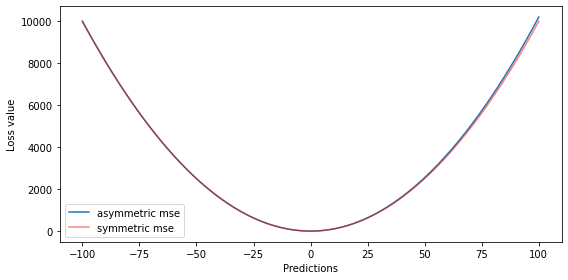

In [113]:
# let's see how our custom loss function looks with respect to different prediction values
import seaborn as sns
import numpy as np

y_true = np.repeat(0,1000)
y_pred = np.linspace(-100,100,1000)
residual = (y_true - y_pred).astype("float")

custom_loss = np.where(residual < 0, (residual**2)*1.02, residual**2) 

fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.lineplot(y_pred, custom_loss, alpha=1, label="asymmetric mse")
sns.lineplot(y_pred, residual**2, alpha = 0.5, label = "symmetric mse", color="red")
ax.set_xlabel("Predictions")
ax.set_ylabel("Loss value")

fig.tight_layout()

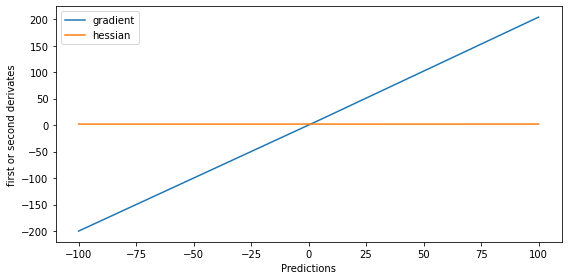

In [114]:
grad, hess = custom_asymmetric_objective(y_true, y_pred)

fig, ax = plt.subplots(1,1, figsize=(8,4))

# ax.plot(y_hat, errors)
ax.plot(y_pred, grad)
ax.plot(y_pred, hess)
ax.legend(('gradient', 'hessian'))
ax.set_xlabel('Predictions')
ax.set_ylabel('first or second derivates')

fig.tight_layout()


## LightGBM custom objective

In [115]:
# # make new model on new value
# gbm3 = lightgbm.LGBMRegressor(random_state=33,device ='gpu',
#                       gpu_platform_id = 0,
#                         gpu_device_id = 0)
# gbm3.set_params(**{'objective': custom_asymmetric_objective}, metrics = ["mse", 'mae'])

# gbm3.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     eval_metric='l2',
#     verbose=False,
# )

## LightGBM_early_boosting custom eval_metric

In [116]:
# # make new model on new value
# gbm4 = lightgbm.LGBMRegressor(random_state=33,
#                               early_stopping_rounds = 10,
#                               n_estimators=10000, 
#                               device ='gpu',
#                           gpu_platform_id = 0,
#                             gpu_device_id = 0)
                             

# gbm4.set_params(**{'objective': "regression"}, metrics = ["mse", 'mae'])

# gbm4.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     eval_metric=custom_asymmetric_eval,
#     verbose=False,
# )

## LightGBM_early_boosting custom objective

In [117]:
# # make new model on new value
# gbm5 = lightgbm.LGBMRegressor(random_state=33,
#                               early_stopping_rounds = 10,
#                               n_estimators=10000,
#                               device ='gpu',
#                           gpu_platform_id = 0,
#                             gpu_device_id = 0)
                             

# gbm5.set_params(**{'objective': custom_asymmetric_objective}, metrics = ["mse", 'mae'])

# gbm5.fit(
#     X_train,
#     y_train,
#     eval_set=[(X_val, y_val)],
#     eval_metric="l2",
#     verbose=False,
# )

## LightGBM_early_boosting custom eval_metric + objective

In [118]:
# make new model on new value
gbm6 = lightgbm.LGBMRegressor(random_state=33,
                              early_stopping_rounds = 10,
                              n_estimators=10000,
                              device ='gpu',
                          gpu_platform_id = 0,
                            gpu_device_id = 0)
                             

gbm6.set_params(**{'objective': custom_asymmetric_objective}, metrics = ["mse", 'mae'])

gbm6.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=custom_asymmetric_eval,
    verbose=False,
)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:158: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', early_stopping_rounds=10, gpu_device_id=0,
              gpu_platform_id=0, importance_type='split', learning_rate=0.1,
              max_depth=-1, metrics=['mse', 'mae'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
              n_jobs=-1, num_leaves=31,
              objective=<function custom_asymmetric_objective at 0x7fe959b8b0e0>,
              random_state=33, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Reporting scores for different models

### Scores table

In [119]:
# 367482367482# asymmetric mse scores
# # _,loss_rf,_ = custom_asymmetric_eval(y_test, rf.predict(X_test))
# y_pred_gbm = gbm.predict(X_test).reshape(320756,1)
# y_pred_gbm2 = gbm2.predict(X_test).reshape(320756,1)
# y_pred_gbm3 = gbm3.predict(X_test).reshape(320756,1)
# y_pred_gbm4 = gbm4.predict(X_test).reshape(320756,1)
# y_pred_gbm5 = gbm5.predict(X_test).reshape(320756,1)
# y_pred_gbm6 = gbm6.predict(X_test).reshape(320756,1)
# _,loss_gbm,_ = custom_asymmetric_eval(y_test, y_pred_gbm)
# _,loss_gbm2,_ = custom_asymmetric_eval(y_test, y_pred_gbm2)
# _,loss_gbm3,_ = custom_asymmetric_eval(y_test, y_pred_gbm3)
# _,loss_gbm4,_ = custom_asymmetric_eval(y_test, y_pred_gbm4)
# _,loss_gbm5,_ = custom_asymmetric_eval(y_test, y_pred_gbm5)
# _,loss_gbm6,_ = custom_asymmetric_eval(y_test, y_pred_gbm6)

In [120]:
# from google.colab import drive
# drive.mount('/content/drive')
# 1417982

In [121]:
# score_dict = {'LightGBM default - gbm' : 
#               {'asymmetric custom mse (test)': loss_gbm,
#               'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm.predict(X_train).reshape(962268,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm.predict(X_test)), 
#                '# boosting rounds' : gbm.booster_.current_iteration()},
              
#               'LightGBM with early stopping - gbm2' : 
#               {'asymmetric custom mse (test)': loss_gbm2,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm2.predict(X_train).reshape(962268,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm2.predict(X_test)),
#                '# boosting rounds' : gbm2.booster_.current_iteration()},
              
#               'LightGBM with custom training loss (no hyperparameter tuning) - gbm3': 
#               {'asymmetric custom mse (test)': loss_gbm3,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm3.predict(X_train).reshape(962268,1))[1],               
#                'symmetric mse': mean_squared_error(y_test, gbm3.predict(X_test)),
#                '# boosting rounds' : gbm3.booster_.current_iteration()},
              
#              'LightGBM with early_stopping and custom validation loss - gbm4': 
#               {'asymmetric custom mse (test)': loss_gbm4,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm4.predict(X_train).reshape(962268,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm4.predict(X_test)),
#                '# boosting rounds' : gbm4.booster_.current_iteration()},
              
#               'LightGBM with early_stopping and custom training loss - gbm5': 
#               {'asymmetric custom mse (test)': loss_gbm5,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm5.predict(X_train).reshape(962268,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm5.predict(X_test)),
#                '# boosting rounds' : gbm5.booster_.current_iteration()}, 
              
#               'LightGBM with early_stopping, custom training and custom validation loss - gbm6': 
#               {'asymmetric custom mse (test)': loss_gbm6,
#                'asymmetric custom mse (train)': custom_asymmetric_eval(y_train, gbm6.predict(X_train).reshape(962268,1))[1],
#                'symmetric mse': mean_squared_error(y_test, gbm6.predict(X_test)),
#                '# boosting rounds' : gbm6.booster_.current_iteration()}
             
#              }

In [122]:
# df_score = pd.DataFrame(score_dict).T
# df_score

In [123]:
# algorithm = ['LightGBM', 'LightGBM', 'LightGBM', 'LightGBM','LightGBM', 'LightGBM']
# training_loss = ['default mse','default mse', 'aymmetric mse', 'default mse', 'aymmetric mse', 'aymmetric mse']
# hyperparamters_tuned = ['none','boosting rounds','none','boosting rounds','boosting rounds','boosting rounds']
# validation_loss = ['default mse','default mse','default mse', 'asymmetric mse', 'default mse', 'asymmetric mse']

# df_score['Algorithm'] = algorithm
# df_score['Training_loss'] = training_loss
# df_score['Hyperparamters_tuned'] = hyperparamters_tuned
# df_score['Validation_loss'] = validation_loss

In [124]:
# df_score

In [125]:
# cols = df_score.columns.tolist()
# cols

In [126]:
# df_score[['Algorithm','Training_loss', 'Hyperparamters_tuned', 'Validation_loss', '# boosting rounds','asymmetric custom mse (test)', 'asymmetric custom mse (train)', 'symmetric mse']]

In [127]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# ax1, ax2 = ax.flatten()

# # ax1.plot(rf.predict(X_test), y_test, 'o', color='#1c9099')
# # ax1.set_xlabel('Predictions')
# # ax1.set_ylabel('Actuals')
# # ax1.set_title('Random Forest')  

# ax1.plot(gbm.predict(X_test), y_test, 'o', color='#1c9099')
# ax1.set_xlabel('Predictions')
# ax1.set_ylabel('Actuals')
# ax1.set_title('LightGBM default') 

# ax2.plot(gbm2.predict(X_test), y_test, 'o', color='#1c9099')
# ax2.set_xlabel('Predictions')
# ax2.set_ylabel('Actuals')
# ax2.set_title('gbm2') 

# # ax3.plot(gbm3.predict(X_test), y_test, 'o', color='#1c9099')
# # ax3.set_xlabel('Predictions')
# # ax3.set_ylabel('Actuals')
# # ax3.set_title('gbm3') 

# # ax4.plot(gbm4.predict(X_test), y_test, 'o', color='#1c9099')
# # ax4.set_xlabel('Predictions')
# # ax4.set_ylabel('Actuals')
# # ax4.set_title('gbm4') 

# # ax5.plot(gbm5.predict(X_test), y_test, 'o', color='#1c9099')
# # ax5.set_xlabel('Predictions')
# # ax5.set_ylabel('Actuals')
# # ax5.set_title('gbm5') 

# # ax6.plot(gbm6.predict(X_test), y_test, 'o', color='#1c9099')
# # ax6.set_xlabel('Predictions')
# # ax6.set_ylabel('Actuals')
# # ax6.set_title('gbm6 - LightGBM with early_stopping, \n custom objective and custom evalution') 

# fig.suptitle("Scatter plots of predictions vs. actual targets for different models", y = 1.05, fontsize=15)
# fig.tight_layout()


In [128]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# ax3, ax4 = ax.flatten()

# ax3.plot(gbm3.predict(X_test), y_test, 'o', color='#1c9099')
# ax3.set_xlabel('Predictions')
# ax3.set_ylabel('Actuals')
# ax3.set_title('gbm3') 

# ax4.plot(gbm4.predict(X_test), y_test, 'o', color='#1c9099')
# ax4.set_xlabel('Predictions')
# ax4.set_ylabel('Actuals')
# ax4.set_title('gbm4') 

# fig.suptitle("Scatter plots of predictions vs. actual targets for different models", y = 1.05, fontsize=15)
# fig.tight_layout()


In [129]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
# ax5, ax6 = ax.flatten()


# ax5.plot(gbm5.predict(X_test), y_test, 'o', color='#1c9099')
# ax5.set_xlabel('Predictions')
# ax5.set_ylabel('Actuals')
# ax5.set_title('gbm5') 

# ax6.plot(gbm6.predict(X_test), y_test, 'o', color='#1c9099')
# ax6.set_xlabel('Predictions')
# ax6.set_ylabel('Actuals')
# ax6.set_title('gbm6 - LightGBM with early_stopping, \n custom objective and custom evalution') 

# fig.suptitle("Scatter plots of predictions vs. actual targets for different models", y = 1.05, fontsize=15)
# fig.tight_layout()

## MAE - Test set

In [130]:
# print(mean_absolute_error(y_test, gbm.predict(X_test)))
# print(mean_absolute_error(y_test, gbm2.predict(X_test)))
# print(mean_absolute_error(y_test, gbm3.predict(X_test)))
# print(mean_absolute_error(y_test, gbm4.predict(X_test)))
# print(mean_absolute_error(y_test, gbm5.predict(X_test)))
# print(mean_absolute_error(y_test, gbm6.predict(X_test)))
# # print(mean_absolute_error(y_test, gbm4.predict(X_test)))

## MAE - Validation set

In [131]:
# print(mean_absolute_error(y_val, gbm.predict(X_val)))
# print(mean_absolute_error(y_val, gbm2.predict(X_val)))
# print(mean_absolute_error(y_val, gbm3.predict(X_val)))
# print(mean_absolute_error(y_val, gbm4.predict(X_val)))
# print(mean_absolute_error(y_val, gbm5.predict(X_val)))
# print(mean_absolute_error(y_val, gbm6.predict(X_val)))

## Error analysis for validation set

In [132]:
# len_val = X_val['length'].values

In [133]:
# y_val.values

In [134]:
# y_pred_val = gbm4.predict(X_val)
# y_pred_val

In [135]:
# df_val_error = pd.DataFrame()
  
# # append columns to an empty DataFrame

# df_val_error['len_val'] = len_val
# df_val_error['y_val'] = y_val.values
# df_val_error['y_pred_val'] = y_pred_val
# df_val_error.index = index_val
  
# df_val_error.head(10)

In [136]:
# df_val_error['absolute_error'] = abs(df_val_error['y_pred_val'] - df_val_error['y_val'])

In [137]:
# df_val_error.head(20)

In [138]:
# plt.scatter(df_val_error['len_val'], df_val_error['absolute_error'])
# plt.title("length Vs abs error for validation set", fontsize = 20)
# plt.xlabel('length', fontsize=16)
# plt.ylabel('abs error', fontsize=16)
# plt.show()

## Error analysis for test set

In [139]:
len_test = X_test['length'].values

In [140]:
y_pred_test = gbm6.predict(X_test)
y_pred_test

array([0.59657304, 0.49910877, 0.4555929 , ..., 0.83898121, 0.4913341 ,
       0.56280986])

In [141]:
df_test_error = pd.DataFrame()
  
# append columns to an empty DataFrame

df_test_error['len_test'] = len_test
df_test_error['y_test'] = y_test.values
df_test_error['y_pred_test'] = y_pred_test
df_test_error.index = index_test
  
df_test_error.head(10)


,len_test,y_test,y_pred_test
20440946,8.05,0.731881,0.596573
4270225,7.23,0.354765,0.499109
17681845,9.25,0.452936,0.455593
15885703,8.63,0.474432,0.551044
5365683,5.70,0.550087,0.625333
6076209,8.02,0.527943,0.484480
18793196,8.63,0.704246,0.542056
13709471,9.23,0.293397,0.382019
16166379,9.90,0.336586,0.393716
9746515,9.41,0.411392,0.433284


In [142]:
df_test_error['absolute_error'] = abs(df_test_error['y_pred_test'] - df_test_error['y_test'])

In [143]:
df_test_error.head(15)

,len_test,y_test,y_pred_test,absolute_error
20440946,8.05,0.731881,0.596573,0.135308
4270225,7.23,0.354765,0.499109,0.144344
17681845,9.25,0.452936,0.455593,0.002657
15885703,8.63,0.474432,0.551044,0.076612
5365683,5.70,0.550087,0.625333,0.075246
6076209,8.02,0.527943,0.484480,0.043464
18793196,8.63,0.704246,0.542056,0.162190
13709471,9.23,0.293397,0.382019,0.088623
16166379,9.90,0.336586,0.393716,0.057130
9746515,9.41,0.411392,0.433284,0.021892


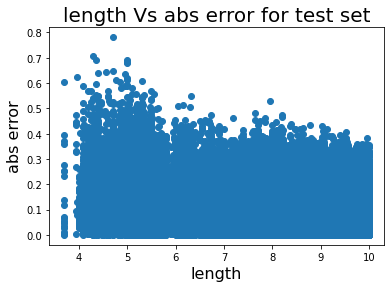

In [144]:
plt.scatter(df_test_error['len_test'], df_test_error['absolute_error'])
plt.title("length Vs abs error for test set", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('abs error', fontsize=16)
plt.show()

In [145]:
df_test_error['actual_catch'] = np.exp(df_test_error['y_test'] * df_test_error['len_test'])
df_test_error['predicted_catch'] = np.exp(df_test_error['y_pred_test'] * df_test_error['len_test'])

In [146]:
df_test_error['actual_abs_error'] = abs(df_test_error['actual_catch'] - df_test_error['predicted_catch'])
df_test_error.head(10)

,len_test,y_test,y_pred_test,absolute_error,actual_catch,predicted_catch,actual_abs_error
20440946,8.05,0.731881,0.596573,0.135308,362.0,121.803977,240.196023
4270225,7.23,0.354765,0.499109,0.144344,13.0,36.912728,23.912728
17681845,9.25,0.452936,0.455593,0.002657,66.0,67.642357,1.642357
15885703,8.63,0.474432,0.551044,0.076612,60.0,116.222484,56.222484
5365683,5.70,0.550087,0.625333,0.075246,23.0,35.318136,12.318136
6076209,8.02,0.527943,0.484480,0.043464,69.0,48.692543,20.307457
18793196,8.63,0.704246,0.542056,0.162190,436.0,107.548964,328.451036
13709471,9.23,0.293397,0.382019,0.088623,15.0,33.989061,18.989061
16166379,9.90,0.336586,0.393716,0.057130,28.0,49.293260,21.293260
9746515,9.41,0.411392,0.433284,0.021892,48.0,58.980347,10.980347


MAE - 119 Kg

MAX error - 3805.64 kg

In [147]:
df_test_error['actual_abs_error'].describe()

count    320756.000000
mean        119.207799
std         229.283425
min           0.000120
25%          17.539035
50%          43.947096
75%         112.567525
max        3786.151813
Name: actual_abs_error, dtype: float64

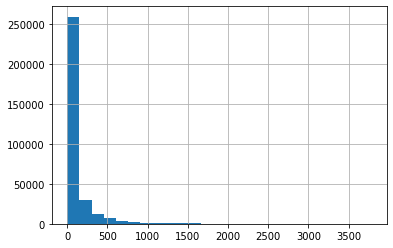

In [148]:
df_test_error['actual_abs_error'].hist(bins=25)

we can see that out of 367482 entries , 16356 entries had error>500 and the rest had less than 500.

we need to examine these entries where the error is abnormally high

In [149]:
df_test_high_error = df_test_error[df_test_error['actual_abs_error'] > 500]
df_test_high_error

,len_test,y_test,y_pred_test,absolute_error,actual_catch,predicted_catch,actual_abs_error
10011288,9.25,0.778101,0.574804,0.203297,1336.0,203.759391,1132.240609
12520330,8.53,0.838668,0.657677,0.180991,1279.0,273.139476,1005.860524
5170382,9.01,0.709981,0.483622,0.226359,600.0,78.056643,521.943357
16575879,9.98,0.739254,0.571849,0.167405,1600.0,300.983640,1299.016360
18647761,7.90,0.814093,0.598373,0.215720,621.0,112.972682,508.027318
...,...,...,...,...,...,...,...
13122840,9.39,0.846323,0.563045,0.283278,2827.0,197.747831,2629.252169
13907260,9.23,0.723411,0.577344,0.146067,794.0,206.207910,587.792090
13915448,9.89,0.805484,0.627910,0.177575,2882.0,497.713689,2384.286311
4557841,9.41,0.804510,0.580850,0.223661,1940.0,236.463942,1703.536058


In [150]:
X_test_high_error = X_test[X_test.index.isin(df_test_high_error.index)]
X_test_high_error

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102201,Art - FDIR (kode)_102202
10011288,9.25,22.0,8.0,18.45225,69.80871,7882.422985,211.0,3,0,0,1
12520330,8.53,33.0,8.0,23.50000,71.25000,8101.183805,110.0,4,0,0,1
5170382,9.01,22.0,8.0,13.51657,66.70542,7493.088598,211.0,1,0,0,1
16575879,9.98,33.0,8.0,24.52052,71.23199,8114.905812,110.0,4,0,0,1
18647761,7.90,33.0,8.0,21.54827,70.73675,8020.538261,211.0,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13122840,9.39,22.0,8.0,20.45130,70.26784,7956.896266,211.0,4,0,0,1
13907260,9.23,33.0,8.0,12.33333,67.33333,7548.407398,211.0,3,0,0,1
13915448,9.89,31.0,8.0,13.44548,68.29821,7663.761204,211.0,4,0,0,1
4557841,9.41,22.0,8.0,28.06428,70.41512,8094.444741,211.0,2,0,0,1


In [151]:
X_test_high_error['Redskap (kode)'].value_counts()

33.0    7697
22.0    5780
32.0    1578
31.0    1338
20.0      34
61.0      34
30.0      14
42.0       6
34.0       3
21.0       2
Name: Redskap (kode), dtype: int64

In [152]:
X_test_high_error['Produkttilstand (kode)'].value_counts()

211.0    11758
110.0     4269
210.0      381
630.0       61
641.0        7
100.0        6
642.0        4
Name: Produkttilstand (kode), dtype: int64

locations for which error comes out tobe exceptionally high(error>500kg)

In [153]:
lat = X_test_high_error['Lat (lokasjon)'].values
lon = X_test_high_error['Lon (lokasjon)'].values

In [154]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

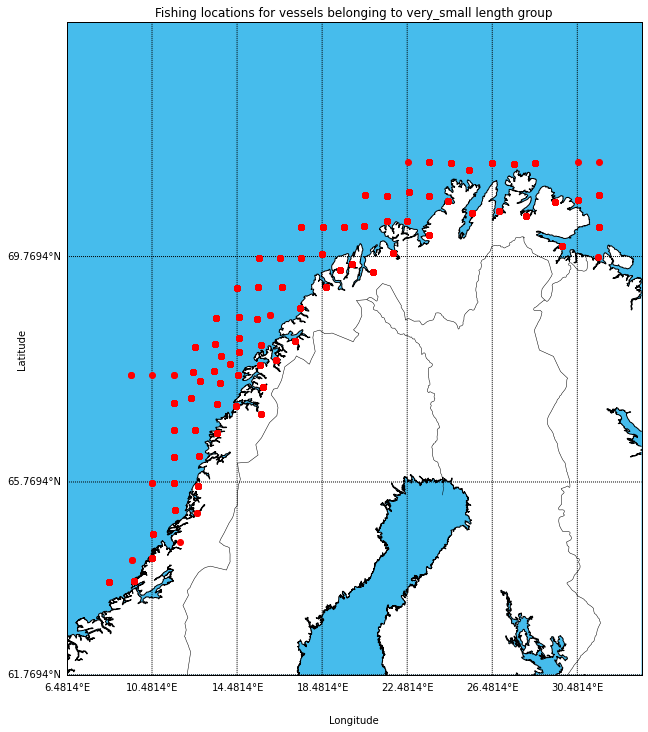

In [155]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m4 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m4.drawcoastlines()
m4.drawcountries()
m4.drawstates()
m4.drawmapboundary(fill_color='#46bcec')
m4.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m4(lon, lat)
# plot points as blue dots
m4.scatter(lons, lats, marker = 'o', color='r', zorder=5)
#plt.legend()
plt.title("Fishing locations for vessels belonging to very_small length group")
#drawing grid lines
m4.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m4.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

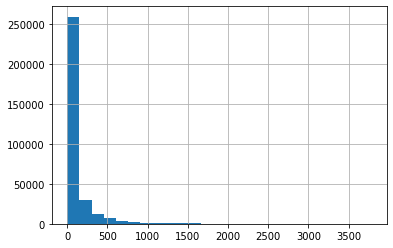

In [156]:
df_test_error['actual_abs_error'].hist(bins=25)

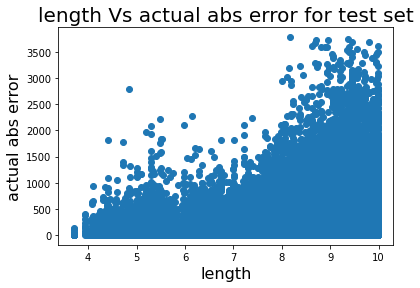

In [157]:
plt.scatter(df_test_error['len_test'], df_test_error['actual_abs_error'])
plt.title("length Vs actual abs error for test set", fontsize = 20)
plt.xlabel('length', fontsize=16)
plt.ylabel('actual abs error', fontsize=16)
plt.show()

In [158]:
X_test['abs_error'] = df_test_error['actual_abs_error']
X_test.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102201,Art - FDIR (kode)_102202,abs_error
20440946,8.05,22.0,8.0,14.56579,68.15924,7660.823182,211.0,3,0,0,1,240.196023
4270225,7.23,22.0,8.0,19.89177,69.64928,7885.074619,211.0,4,0,0,1,23.912728
17681845,9.25,33.0,8.0,23.49366,70.11048,7986.003008,211.0,9,0,0,1,1.642357
15885703,8.63,32.0,8.0,11.50000,67.25000,7531.397912,211.0,5,0,0,1,56.222484
5365683,5.70,33.0,8.0,19.50000,70.25000,7942.174377,211.0,8,0,0,1,12.318136
6076209,8.02,22.0,8.0,10.50000,65.75000,7359.042688,211.0,8,0,0,1,20.307457
18793196,8.63,22.0,8.0,12.68927,66.25914,7435.959788,110.0,2,0,0,1,328.451036
13709471,9.23,33.0,8.0,11.50000,66.25000,7422.832889,642.0,5,0,0,1,18.989061
16166379,9.90,33.0,8.0,18.65184,69.26688,7828.319932,211.0,1,0,0,1,21.293260
9746515,9.41,22.0,8.0,13.51657,66.70542,7493.088598,211.0,5,0,0,1,10.980347


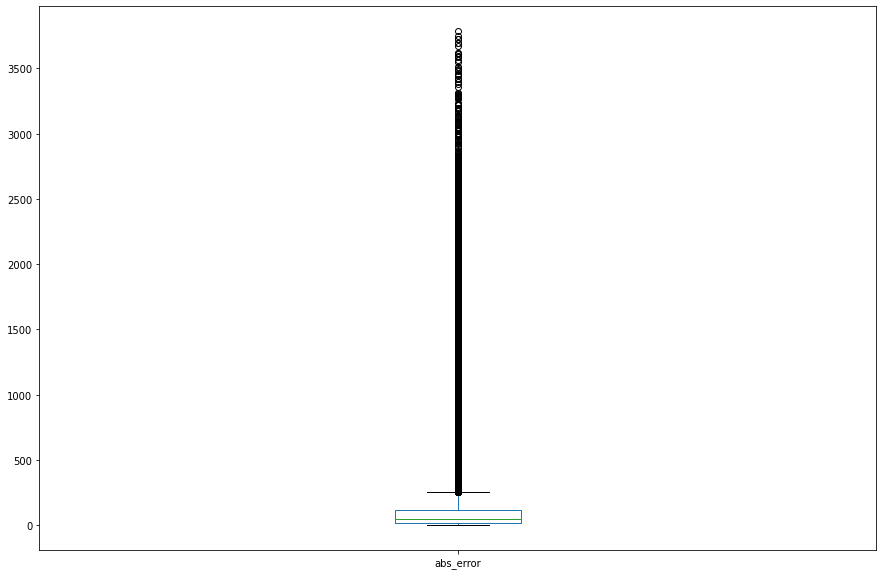

In [159]:
X_test.boxplot(figsize=(15,10), column =['abs_error'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


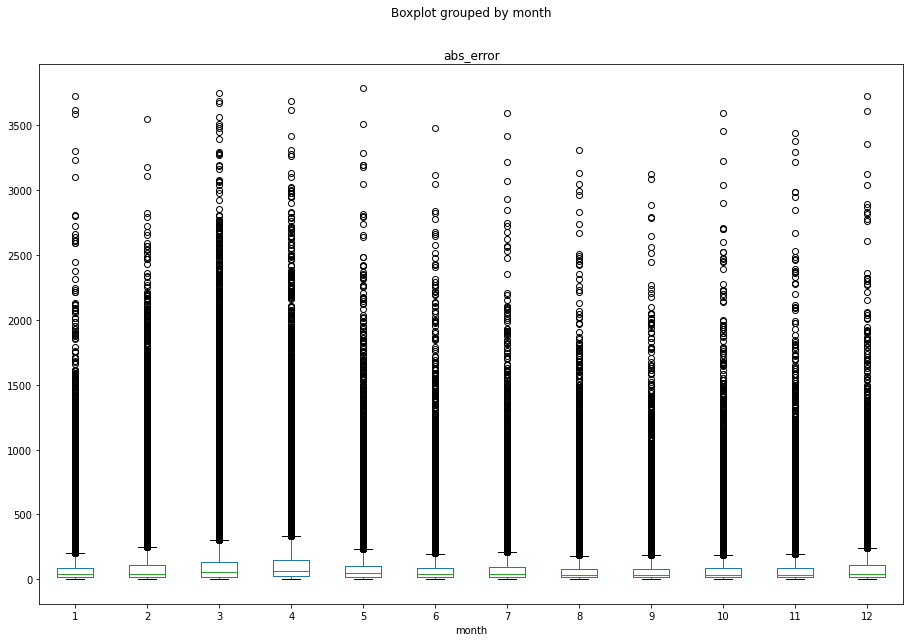

In [160]:
X_test.boxplot(by ='month',figsize=(15,10), column =['abs_error'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


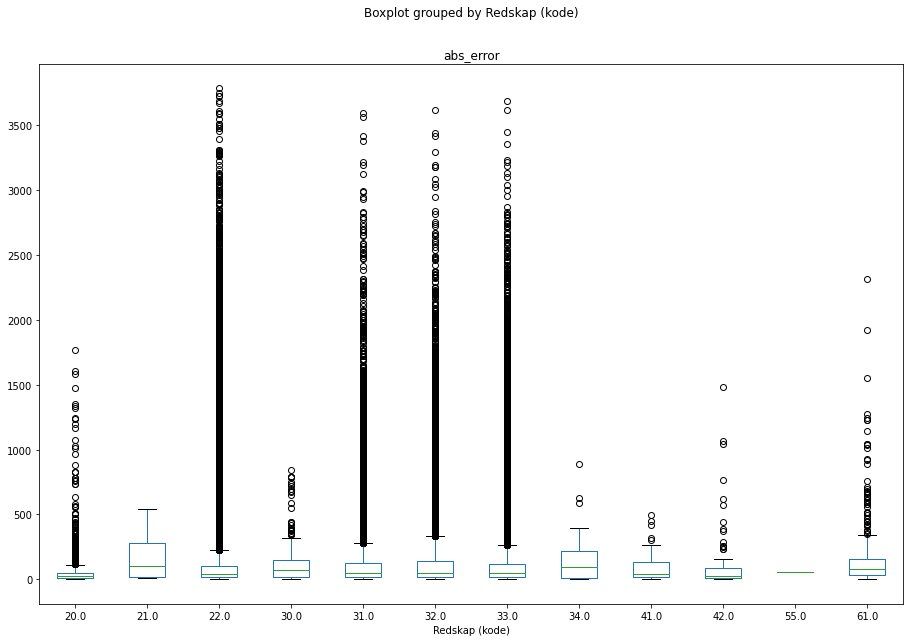

In [161]:
X_test.boxplot(by ='Redskap (kode)',figsize=(15,10), column =['abs_error'], grid = False)

## month - error analysis

grouping by the months and summing over the absolute error to see which month/months has/have suffered max error

In [162]:
# list_month = [1,2,3,4,5,6,7,8,9,10,11,12]
# list_freq_occurence_month = []
# for i in list_month:
#   list_freq_occurence_month.append(len(X_test[X_test['month'] == i]))

In [163]:
# list_freq_occurence_month

In [164]:
df_month_abserror = X_test.groupby(['month'])['abs_error'].agg('sum').rename_axis('month').reset_index(name='total_abs_error')
df_month_abserror

,month,total_abs_error
0,1,2.180062e+06
1,2,4.193216e+06
2,3,1.009494e+07
3,4,7.519398e+06
4,5,2.775707e+06
5,6,1.995353e+06
6,7,1.527117e+06
7,8,1.717556e+06
8,9,1.507024e+06
9,10,1.585729e+06


In [165]:
list_months= df_month_abserror['month'].to_list()
list_months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [166]:
list_freq_occurence_month = []
for i in list_months:
  list_freq_occurence_month.append(len(X_test[X_test['month'] == i]))

In [167]:
list_freq_occurence_month

[21556,
 36478,
 73540,
 52092,
 25231,
 19402,
 13949,
 17835,
 15324,
 16040,
 16534,
 12775]

In [168]:
df_month_abserror['freq_occurence_month'] = list_freq_occurence_month
df_month_abserror

,month,total_abs_error,freq_occurence_month
0,1,2.180062e+06,21556
1,2,4.193216e+06,36478
2,3,1.009494e+07,73540
3,4,7.519398e+06,52092
4,5,2.775707e+06,25231
5,6,1.995353e+06,19402
6,7,1.527117e+06,13949
7,8,1.717556e+06,17835
8,9,1.507024e+06,15324
9,10,1.585729e+06,16040


In [169]:
df_month_abserror['avg_abs_error'] = df_month_abserror['total_abs_error']/df_month_abserror['freq_occurence_month']
df_month_abserror

,month,total_abs_error,freq_occurence_month,avg_abs_error
0,1,2.180062e+06,21556,101.134802
1,2,4.193216e+06,36478,114.951920
2,3,1.009494e+07,73540,137.271377
3,4,7.519398e+06,52092,144.348418
4,5,2.775707e+06,25231,110.011771
5,6,1.995353e+06,19402,102.842671
6,7,1.527117e+06,13949,109.478625
7,8,1.717556e+06,17835,96.302534
8,9,1.507024e+06,15324,98.344013
9,10,1.585729e+06,16040,98.860887


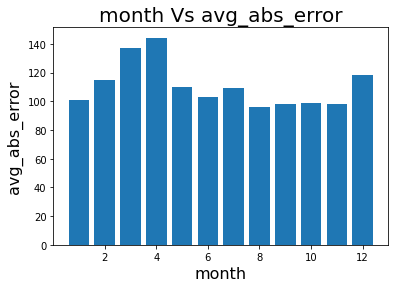

In [170]:
plt.bar(df_month_abserror['month'], df_month_abserror['avg_abs_error'])
plt.title("month Vs avg_abs_error", fontsize = 20)
plt.xlabel('month', fontsize=16)
plt.ylabel('avg_abs_error', fontsize=16)
plt.show()

## gear code - error analysis

grouping by the gears and summing over the absolute error to see which gears has/have suffered max error

In [171]:
df_gear_abserror = X_test.groupby(['Redskap (kode)'])['abs_error'].agg('sum').rename_axis('gear_code').reset_index(name='total_abs_error')
df_gear_abserror

,gear_code,total_abs_error
0,20.0,1.199772e+05
1,21.0,1.512489e+03
2,22.0,1.352433e+07
3,30.0,3.808066e+04
4,31.0,2.804825e+06
5,32.0,3.207097e+06
6,33.0,1.845736e+07
7,34.0,5.882366e+03
8,41.0,3.090638e+03
9,42.0,1.163171e+04


In [172]:
list_gears = df_gear_abserror['gear_code'].to_list()
list_gears

[20.0, 21.0, 22.0, 30.0, 31.0, 32.0, 33.0, 34.0, 41.0, 42.0, 55.0, 61.0]

In [173]:
list_freq_occurence_gear = []
for i in list_gears:
  list_freq_occurence_gear.append(len(X_test[X_test['Redskap (kode)'] == i]))

In [174]:
list_freq_occurence_gear

[2041, 8, 117835, 309, 20851, 21447, 157723, 37, 26, 112, 1, 366]

In [175]:
df_gear_abserror['freq_occurence_gear'] = list_freq_occurence_gear
df_gear_abserror

,gear_code,total_abs_error,freq_occurence_gear
0,20.0,1.199772e+05,2041
1,21.0,1.512489e+03,8
2,22.0,1.352433e+07,117835
3,30.0,3.808066e+04,309
4,31.0,2.804825e+06,20851
5,32.0,3.207097e+06,21447
6,33.0,1.845736e+07,157723
7,34.0,5.882366e+03,37
8,41.0,3.090638e+03,26
9,42.0,1.163171e+04,112


In [176]:
df_gear_abserror['avg_abs_error'] = df_gear_abserror['total_abs_error']/df_gear_abserror['freq_occurence_gear']
df_gear_abserror

,gear_code,total_abs_error,freq_occurence_gear,avg_abs_error
0,20.0,1.199772e+05,2041,58.783559
1,21.0,1.512489e+03,8,189.061063
2,22.0,1.352433e+07,117835,114.773424
3,30.0,3.808066e+04,309,123.238385
4,31.0,2.804825e+06,20851,134.517547
5,32.0,3.207097e+06,21447,149.535933
6,33.0,1.845736e+07,157723,117.023865
7,34.0,5.882366e+03,37,158.982874
8,41.0,3.090638e+03,26,118.870684
9,42.0,1.163171e+04,112,103.854557


In [177]:
df_gear_abserror['avg_abs_error'].max()

189.0610625673028

In [178]:
df_gear_abserror[df_gear_abserror['avg_abs_error'] == df_gear_abserror['avg_abs_error'].max()]

,gear_code,total_abs_error,freq_occurence_gear,avg_abs_error
1,21.0,1512.488501,8,189.061063


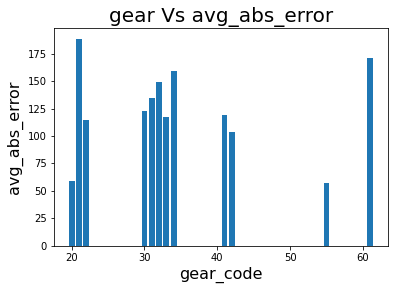

In [179]:
plt.bar(df_gear_abserror['gear_code'], df_gear_abserror['avg_abs_error'])
plt.title("gear Vs avg_abs_error", fontsize = 20)
plt.xlabel('gear_code', fontsize=16)
plt.ylabel('avg_abs_error', fontsize=16)
plt.show()

## location  - error analysis

In [180]:
# df_location_error = df_model_torsk[df_model_torsk.index.isin(X_test.index)]
# df_location_error = df_model_torsk.loc[df_model_torsk.index & X_test.index]
# df_location_error.head(10)

df_location_error  = df_model_torsk.loc[X_test.index]
df_location_error.head(10)
# df_model_torsk[ X_test.index].head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt
20440946,8.05,22.0,102202,80046,8.0,14.56579,68.15924,7660.823182,211.0,3,0.731881
4270225,7.23,22.0,102202,80428,8.0,19.89177,69.64928,7885.074619,211.0,4,0.354765
17681845,9.25,33.0,102202,80415,8.0,23.49366,70.11048,7986.003008,211.0,9,0.452936
15885703,8.63,32.0,102202,80003,8.0,11.50000,67.25000,7531.397912,211.0,5,0.474432
5365683,5.70,33.0,102202,80402,8.0,19.50000,70.25000,7942.174377,211.0,8,0.550087
6076209,8.02,22.0,102202,80622,8.0,10.50000,65.75000,7359.042688,211.0,8,0.527943
18793196,8.63,22.0,102202,80633,8.0,12.68927,66.25914,7435.959788,110.0,2,0.704246
13709471,9.23,33.0,102202,80627,8.0,11.50000,66.25000,7422.832889,642.0,5,0.293397
16166379,9.90,33.0,102202,80540,8.0,18.65184,69.26688,7828.319932,211.0,1,0.336586
9746515,9.41,22.0,102202,80632,8.0,13.51657,66.70542,7493.088598,211.0,5,0.411392


In [181]:
df_location_error['abs_error'] = df_test_error['actual_abs_error']
df_location_error.head(10)

,Største lengde,Redskap (kode),Art - FDIR (kode),Fangstfelt (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Produktvekt,abs_error
20440946,8.05,22.0,102202,80046,8.0,14.56579,68.15924,7660.823182,211.0,3,0.731881,240.196023
4270225,7.23,22.0,102202,80428,8.0,19.89177,69.64928,7885.074619,211.0,4,0.354765,23.912728
17681845,9.25,33.0,102202,80415,8.0,23.49366,70.11048,7986.003008,211.0,9,0.452936,1.642357
15885703,8.63,32.0,102202,80003,8.0,11.50000,67.25000,7531.397912,211.0,5,0.474432,56.222484
5365683,5.70,33.0,102202,80402,8.0,19.50000,70.25000,7942.174377,211.0,8,0.550087,12.318136
6076209,8.02,22.0,102202,80622,8.0,10.50000,65.75000,7359.042688,211.0,8,0.527943,20.307457
18793196,8.63,22.0,102202,80633,8.0,12.68927,66.25914,7435.959788,110.0,2,0.704246,328.451036
13709471,9.23,33.0,102202,80627,8.0,11.50000,66.25000,7422.832889,642.0,5,0.293397,18.989061
16166379,9.90,33.0,102202,80540,8.0,18.65184,69.26688,7828.319932,211.0,1,0.336586,21.293260
9746515,9.41,22.0,102202,80632,8.0,13.51657,66.70542,7493.088598,211.0,5,0.411392,10.980347


In [182]:
df_location_error['Fangstfelt (kode)'].nunique()

135

In [183]:
df_location_abserror = df_location_error.groupby(['Fangstfelt (kode)'])['abs_error'].agg('sum').rename_axis('area_code').reset_index(name='total_abs_error')
df_location_abserror
# .sort_values(['total_abs_error'], ascending=[False]).head(100)

,area_code,total_abs_error
0,00003,10987.819301
1,00303,299.385901
2,00306,1109.056646
3,00307,1517.238939
4,00308,273.720452
...,...,...
130,80637,17692.608717
131,80638,81499.009489
132,80708,133363.796380
133,80725,73229.641009


In [184]:
list_locations = df_location_abserror['area_code'].to_list()
list_locations

['00003',
 '00303',
 '00306',
 '00307',
 '00308',
 '00311',
 '00312',
 '00313',
 '00314',
 '00315',
 '00319',
 '00406',
 '00411',
 '00418',
 '00419',
 '00423',
 '00424',
 '00425',
 '00426',
 '00506',
 '00507',
 '00508',
 '00509',
 '00512',
 '00513',
 '00514',
 '00515',
 '00517',
 '00519',
 '00520',
 '00521',
 '00522',
 '00523',
 '00524',
 '00530',
 '00532',
 '00535',
 '00536',
 '00612',
 '00620',
 '00624',
 '00627',
 '01201',
 '01206',
 '80003',
 '80004',
 '80005',
 '80010',
 '80011',
 '80037',
 '80038',
 '80044',
 '80045',
 '80046',
 '80047',
 '80048',
 '80049',
 '80050',
 '80051',
 '80052',
 '80053',
 '80054',
 '80301',
 '80302',
 '80303',
 '80305',
 '80306',
 '80307',
 '80308',
 '80310',
 '80311',
 '80312',
 '80313',
 '80324',
 '80325',
 '80401',
 '80402',
 '80403',
 '80404',
 '80405',
 '80409',
 '80410',
 '80411',
 '80412',
 '80413',
 '80414',
 '80415',
 '80423',
 '80424',
 '80425',
 '80426',
 '80427',
 '80428',
 '80429',
 '80508',
 '80509',
 '80514',
 '80515',
 '80516',
 '80519',


In [185]:
location_latitude_dict = df_location_error.set_index('Fangstfelt (kode)').to_dict()['Lat (lokasjon)']
location_latitude_dict

{'00003': 67.25,
 '00303': 70.25,
 '00306': 70.64198,
 '00307': 70.66667,
 '00308': 70.75,
 '00311': 71.21473,
 '00312': 71.23613,
 '00313': 71.25,
 '00314': 71.25,
 '00315': 71.25,
 '00319': 71.75,
 '00406': 70.75,
 '00411': 70.73675,
 '00418': 71.25,
 '00419': 71.25,
 '00423': 71.25,
 '00424': 71.25,
 '00425': 71.23199,
 '00426': 71.13554,
 '00506': 67.75,
 '00507': 67.75,
 '00508': 67.75,
 '00509': 67.80045,
 '00512': 68.25,
 '00513': 68.25,
 '00514': 68.25,
 '00515': 68.29821,
 '00517': 68.75,
 '00519': 68.75,
 '00520': 68.75918,
 '00521': 69.25,
 '00522': 69.25,
 '00523': 69.25,
 '00524': 69.26583000000001,
 '00530': 69.74206,
 '00532': 70.25,
 '00535': 70.25,
 '00536': 70.75,
 '00612': 64.74619,
 '00620': 65.75,
 '00624': 66.25,
 '00627': 66.25,
 '01201': 71.75,
 '01206': 71.75,
 '80003': 67.25,
 '80004': 67.33333,
 '80005': 67.22556,
 '80010': 67.82298,
 '80011': 67.75442,
 '80037': 68.34791,
 '80038': 68.01399,
 '80044': 68.27428,
 '80045': 67.93413000000001,
 '80046': 68.15924

In [186]:
location_latitude_dict['00003']

67.25

In [187]:
location_longitude_dict = df_location_error.set_index('Fangstfelt (kode)').to_dict()['Lon (lokasjon)']
location_longitude_dict

{'00003': 11.5,
 '00303': 31.5,
 '00306': 29.425929999999997,
 '00307': 30.5,
 '00308': 31.5,
 '00311': 27.519959999999998,
 '00312': 28.487109999999998,
 '00313': 29.5,
 '00314': 30.5,
 '00315': 31.5,
 '00319': 29.5,
 '00406': 16.5,
 '00411': 21.548270000000002,
 '00418': 17.5,
 '00419': 18.5,
 '00423': 22.5,
 '00424': 23.5,
 '00425': 24.52052,
 '00426': 25.37756,
 '00506': 9.5,
 '00507': 10.5,
 '00508': 11.5,
 '00509': 12.38605,
 '00512': 10.5,
 '00513': 11.5,
 '00514': 12.5,
 '00515': 13.445479999999998,
 '00517': 11.5,
 '00519': 13.5,
 '00520': 14.564010000000001,
 '00521': 12.5,
 '00522': 13.5,
 '00523': 14.5,
 '00524': 15.47374,
 '00530': 17.491,
 '00532': 14.5,
 '00535': 17.5,
 '00536': 15.5,
 '00612': 10.50548,
 '00620': 8.5,
 '00624': 8.5,
 '00627': 11.5,
 '01201': 16.0,
 '01206': 25.5,
 '80003': 11.5,
 '80004': 12.33333,
 '80005': 13.537189999999999,
 '80010': 13.414229999999998,
 '80011': 14.537820000000002,
 '80037': 17.20863,
 '80038': 16.3323,
 '80044': 15.61145,
 '80045'

In [188]:
list_freq_occurence_location = []
list_latitude = []
list_longitude = []
for i in list_locations:
  list_freq_occurence_location.append(len(df_location_error[df_location_error['Fangstfelt (kode)'] == i]))
  
for i in list_locations:
  list_latitude.append(location_latitude_dict[i])

for i in list_locations:
  list_longitude.append(location_longitude_dict[i])

In [189]:
print(len(list_freq_occurence_location))
print(len(list_latitude))
print(len(list_longitude))

135
135
135


In [190]:
list_freq_occurence_location

[48,
 2,
 2,
 8,
 2,
 228,
 45,
 2,
 7,
 4,
 4,
 6,
 64,
 6,
 5,
 1,
 80,
 167,
 71,
 3,
 10,
 37,
 65,
 1,
 3,
 29,
 614,
 3,
 53,
 1518,
 1,
 1,
 1524,
 20,
 1676,
 3,
 1373,
 10,
 1722,
 1,
 1,
 787,
 2,
 1,
 10087,
 7259,
 1853,
 9687,
 1362,
 328,
 173,
 1257,
 1664,
 14101,
 2482,
 8171,
 260,
 1223,
 2015,
 2,
 2234,
 397,
 7,
 3850,
 3466,
 2044,
 2185,
 1874,
 25,
 4636,
 5330,
 289,
 11,
 5521,
 10932,
 2476,
 8071,
 7780,
 3192,
 4017,
 2,
 212,
 22874,
 557,
 2346,
 2091,
 966,
 26,
 5091,
 7976,
 9596,
 8832,
 3078,
 3568,
 51,
 709,
 2047,
 4541,
 1544,
 937,
 9503,
 5866,
 8417,
 5343,
 1466,
 41,
 13717,
 4144,
 1262,
 1638,
 1224,
 1385,
 1661,
 319,
 1,
 1171,
 4,
 6695,
 19,
 5929,
 1137,
 1590,
 6281,
 135,
 5551,
 3183,
 4844,
 14,
 2613,
 120,
 547,
 1483,
 4187,
 1738,
 13]

In [191]:
list_latitude

[67.25,
 70.25,
 70.64198,
 70.66667,
 70.75,
 71.21473,
 71.23613,
 71.25,
 71.25,
 71.25,
 71.75,
 70.75,
 70.73675,
 71.25,
 71.25,
 71.25,
 71.25,
 71.23199,
 71.13554,
 67.75,
 67.75,
 67.75,
 67.80045,
 68.25,
 68.25,
 68.25,
 68.29821,
 68.75,
 68.75,
 68.75918,
 69.25,
 69.25,
 69.25,
 69.26583000000001,
 69.74206,
 70.25,
 70.25,
 70.75,
 64.74619,
 65.75,
 66.25,
 66.25,
 71.75,
 71.75,
 67.25,
 67.33333,
 67.22556,
 67.82298,
 67.75442,
 68.34791,
 68.01399,
 68.27428,
 67.93413000000001,
 68.15924,
 67.94444,
 68.08439,
 67.64251,
 67.61111,
 67.53177,
 67.16667,
 67.19700999999999,
 67.05744,
 69.76997,
 69.93406,
 70.25,
 70.41512,
 70.64198,
 70.66667,
 70.75,
 71.23915,
 71.21473,
 71.23613,
 71.25,
 70.46517,
 70.49274,
 70.25,
 70.25,
 70.26784,
 70.33232,
 70.33884,
 70.75,
 70.75,
 70.73675,
 70.7874,
 70.7379,
 70.65311,
 70.11048000000001,
 71.25,
 71.25,
 71.23199,
 71.13554,
 69.83414,
 69.64928,
 69.51501999999999,
 67.75,
 67.80045,
 68.25,
 68.29821,
 68.4036

In [192]:
list_longitude

[11.5,
 31.5,
 29.425929999999997,
 30.5,
 31.5,
 27.519959999999998,
 28.487109999999998,
 29.5,
 30.5,
 31.5,
 29.5,
 16.5,
 21.548270000000002,
 17.5,
 18.5,
 22.5,
 23.5,
 24.52052,
 25.37756,
 9.5,
 10.5,
 11.5,
 12.38605,
 10.5,
 11.5,
 12.5,
 13.445479999999998,
 11.5,
 13.5,
 14.564010000000001,
 12.5,
 13.5,
 14.5,
 15.47374,
 17.491,
 14.5,
 17.5,
 15.5,
 10.50548,
 8.5,
 8.5,
 11.5,
 16.0,
 25.5,
 11.5,
 12.33333,
 13.537189999999999,
 13.414229999999998,
 14.537820000000002,
 17.20863,
 16.3323,
 15.61145,
 15.57921,
 14.56579,
 14.155560000000001,
 13.71385,
 12.74275,
 13.666670000000002,
 15.721810000000001,
 12.66667,
 14.43561,
 15.59004,
 31.47496,
 29.743270000000003,
 31.5,
 28.06428,
 29.425929999999997,
 30.5,
 31.5,
 26.46578,
 27.519959999999998,
 28.487109999999998,
 29.5,
 25.53489,
 26.79157,
 18.5,
 19.5,
 20.4513,
 21.524620000000002,
 22.462889999999998,
 19.5,
 20.5,
 21.548270000000002,
 22.558329999999998,
 23.489810000000002,
 24.42041,
 23.49366000000

In [193]:
df_location_abserror['freq_occurence_location'] = list_freq_occurence_location
df_location_abserror['latitude'] = list_latitude
df_location_abserror['longitude'] = list_longitude

In [194]:
df_location_abserror.to_csv('north locations.csv')

In [195]:
df_location_abserror['avg_abs_error'] = df_location_abserror['total_abs_error']/df_location_abserror['freq_occurence_location']
df_location_abserror = df_location_abserror.sort_values(['avg_abs_error'], ascending=[False])
df_location_abserror.head(30)

,area_code,total_abs_error,freq_occurence_location,latitude,longitude,avg_abs_error
19,00506,3.266341e+03,3,67.75000,9.50000,1088.780418
2,00306,1.109057e+03,2,70.64198,29.42593,554.528323
62,80301,3.513792e+03,7,69.76997,31.47496,501.970336
68,80308,1.183901e+04,25,70.75000,31.50000,473.560384
23,00512,4.461651e+02,1,68.25000,10.50000,446.165093
9,00315,1.307874e+03,4,71.25000,31.50000,326.968522
20,00507,3.002255e+03,10,67.75000,10.50000,300.225525
25,00514,7.845696e+03,29,68.25000,12.50000,270.541227
105,80529,1.080992e+04,41,69.75000,16.50000,263.656474
8,00314,1.799107e+03,7,71.25000,30.50000,257.015312


In [196]:
threshold = 100

In [197]:
len(df_location_abserror[df_location_abserror['avg_abs_error'] > threshold])

75

In [198]:
len(df_location_abserror[df_location_abserror['avg_abs_error'] < threshold])

60

In [199]:
def error_type (row):
   if row['avg_abs_error'] < threshold:
      return 'low_error'
   else:
      return 'high_error'


In [200]:
df_location_abserror['error_type'] = df_location_abserror.apply (lambda row: error_type(row), axis=1)

In [201]:
df_location_abserror.head(10)

,area_code,total_abs_error,freq_occurence_location,latitude,longitude,avg_abs_error,error_type
19,00506,3266.341255,3,67.75000,9.50000,1088.780418,high_error
2,00306,1109.056646,2,70.64198,29.42593,554.528323,high_error
62,80301,3513.792355,7,69.76997,31.47496,501.970336,high_error
68,80308,11839.009605,25,70.75000,31.50000,473.560384,high_error
23,00512,446.165093,1,68.25000,10.50000,446.165093,high_error
9,00315,1307.874087,4,71.25000,31.50000,326.968522,high_error
20,00507,3002.255252,10,67.75000,10.50000,300.225525,high_error
25,00514,7845.695572,29,68.25000,12.50000,270.541227,high_error
105,80529,10809.915418,41,69.75000,16.50000,263.656474,high_error
8,00314,1799.107186,7,71.25000,30.50000,257.015312,high_error


In [202]:
df_error_type = df_location_abserror['error_type'].value_counts().rename_axis('error_type').reset_index(name='counts')
df_error_type

,error_type,counts
0,high_error,75
1,low_error,60


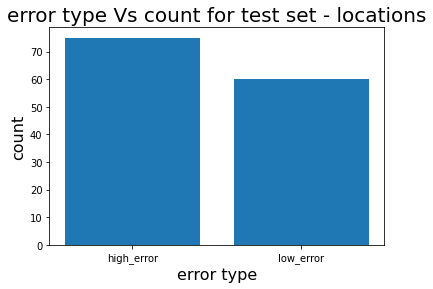

In [203]:
plt.bar(df_error_type['error_type'], df_error_type['counts'])
plt.title("error type Vs count for test set - locations", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [204]:
lat_low_error = df_location_abserror[df_location_abserror['error_type'] == 'low_error']['latitude'].values
lon_low_error = df_location_abserror[df_location_abserror['error_type'] == 'low_error']['longitude'].values

lat_high_error = df_location_abserror[df_location_abserror['error_type'] == 'high_error']['latitude'].values
lon_high_error = df_location_abserror[df_location_abserror['error_type'] == 'high_error']['longitude'].values


In [205]:
lat = df_location_abserror['latitude'].values
lon= df_location_abserror['longitude'].values

In [206]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

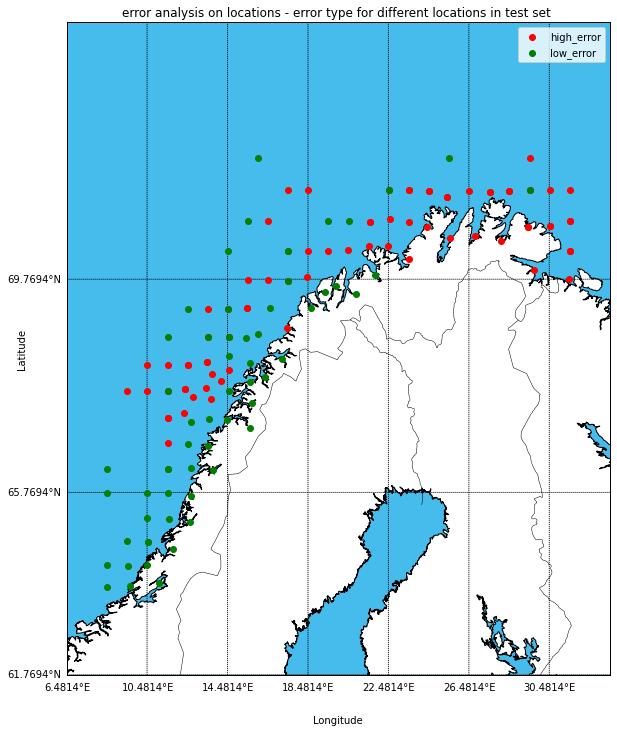

In [207]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m3(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m3(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error')
# plot points as green dots - low_error points
m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error')

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

we need to decide the threshold of error for these vessels, since they are very small hence we set threshold as 100kg.

In [208]:
threshold = 50

In [209]:
def error_type (row):
   if row['actual_abs_error'] < threshold:
      return 'low_error'
   else:
      return 'high_error'


In [210]:
df_test_error['error_type'] = df_test_error.apply (lambda row: error_type(row), axis=1)

In [211]:
df_test_error.head(10)

,len_test,y_test,y_pred_test,absolute_error,actual_catch,predicted_catch,actual_abs_error,error_type
20440946,8.05,0.731881,0.596573,0.135308,362.0,121.803977,240.196023,high_error
4270225,7.23,0.354765,0.499109,0.144344,13.0,36.912728,23.912728,low_error
17681845,9.25,0.452936,0.455593,0.002657,66.0,67.642357,1.642357,low_error
15885703,8.63,0.474432,0.551044,0.076612,60.0,116.222484,56.222484,high_error
5365683,5.70,0.550087,0.625333,0.075246,23.0,35.318136,12.318136,low_error
6076209,8.02,0.527943,0.484480,0.043464,69.0,48.692543,20.307457,low_error
18793196,8.63,0.704246,0.542056,0.162190,436.0,107.548964,328.451036,high_error
13709471,9.23,0.293397,0.382019,0.088623,15.0,33.989061,18.989061,low_error
16166379,9.90,0.336586,0.393716,0.057130,28.0,49.293260,21.293260,low_error
9746515,9.41,0.411392,0.433284,0.021892,48.0,58.980347,10.980347,low_error


In [212]:
df_error_type = df_test_error['error_type'].value_counts().rename_axis('error_type').reset_index(name='counts')
df_error_type

,error_type,counts
0,low_error,172413
1,high_error,148343


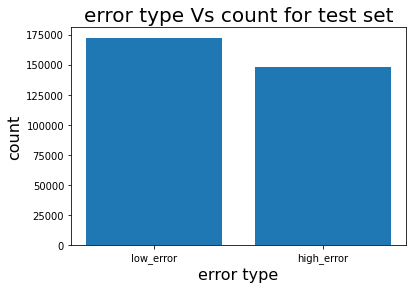

In [213]:
plt.bar(df_error_type['error_type'], df_error_type['counts'])
plt.title("error type Vs count for test set", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

we attain the indexes of low_errors and high errors for further analysis

In [214]:
X_test['error_type'] = df_test_error['error_type']
X_test.head(10)

,length,Redskap (kode),Kyst/hav (kode),Lon (lokasjon),Lat (lokasjon),harvesine_distance,Produkttilstand (kode),month,Art - FDIR (kode)_1022,Art - FDIR (kode)_102201,Art - FDIR (kode)_102202,abs_error,error_type
20440946,8.05,22.0,8.0,14.56579,68.15924,7660.823182,211.0,3,0,0,1,240.196023,high_error
4270225,7.23,22.0,8.0,19.89177,69.64928,7885.074619,211.0,4,0,0,1,23.912728,low_error
17681845,9.25,33.0,8.0,23.49366,70.11048,7986.003008,211.0,9,0,0,1,1.642357,low_error
15885703,8.63,32.0,8.0,11.50000,67.25000,7531.397912,211.0,5,0,0,1,56.222484,high_error
5365683,5.70,33.0,8.0,19.50000,70.25000,7942.174377,211.0,8,0,0,1,12.318136,low_error
6076209,8.02,22.0,8.0,10.50000,65.75000,7359.042688,211.0,8,0,0,1,20.307457,low_error
18793196,8.63,22.0,8.0,12.68927,66.25914,7435.959788,110.0,2,0,0,1,328.451036,high_error
13709471,9.23,33.0,8.0,11.50000,66.25000,7422.832889,642.0,5,0,0,1,18.989061,low_error
16166379,9.90,33.0,8.0,18.65184,69.26688,7828.319932,211.0,1,0,0,1,21.293260,low_error
9746515,9.41,22.0,8.0,13.51657,66.70542,7493.088598,211.0,5,0,0,1,10.980347,low_error


## we can see that for low error majority kyst code is 8 which means thet are close to coast and few outside the coast that yeild low error

In [215]:
low_error_info = X_test[X_test['error_type'] == 'low_error']['Kyst/hav (kode)'].value_counts().rename_axis('kyst_code').reset_index(name='counts')
low_error_info

,kyst_code,counts
0,8.0,166692
1,0.0,5721


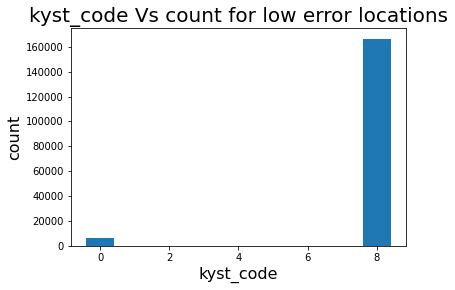

In [216]:
plt.bar(low_error_info['kyst_code'], low_error_info['counts'])
plt.title("kyst_code Vs count for low error locations", fontsize = 20)
plt.xlabel('kyst_code', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

## we can see that for high error majority kyst code is 8 that is they lie close to coast  and a few outside that yeild high error

In [217]:
high_error_info = X_test[X_test['error_type'] == 'high_error']['Kyst/hav (kode)'].value_counts().rename_axis('kyst_code').reset_index(name='counts')
high_error_info

,kyst_code,counts
0,8.0,143854
1,0.0,4489


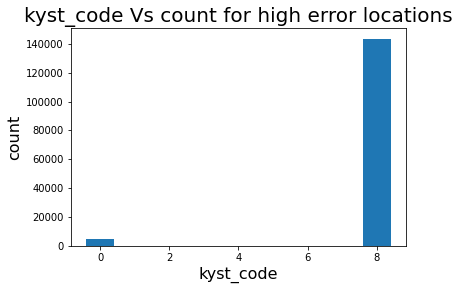

In [218]:
plt.bar(high_error_info['kyst_code'], high_error_info['counts'])
plt.title("kyst_code Vs count for high error locations", fontsize = 20)
plt.xlabel('kyst_code', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

## location wise error analysis 

In [219]:
lat_low_error = X_test[X_test['error_type'] == 'low_error']['Lat (lokasjon)'].values
lon_low_error= X_test[X_test['error_type'] == 'low_error']['Lon (lokasjon)'].values

lat_high_error = X_test[X_test['error_type'] == 'high_error']['Lat (lokasjon)'].values
lon_high_error = X_test[X_test['error_type'] == 'high_error']['Lon (lokasjon)'].values


In [220]:
lat = X_test['Lat (lokasjon)'].values
lon= X_test['Lon (lokasjon)'].values

In [221]:
# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


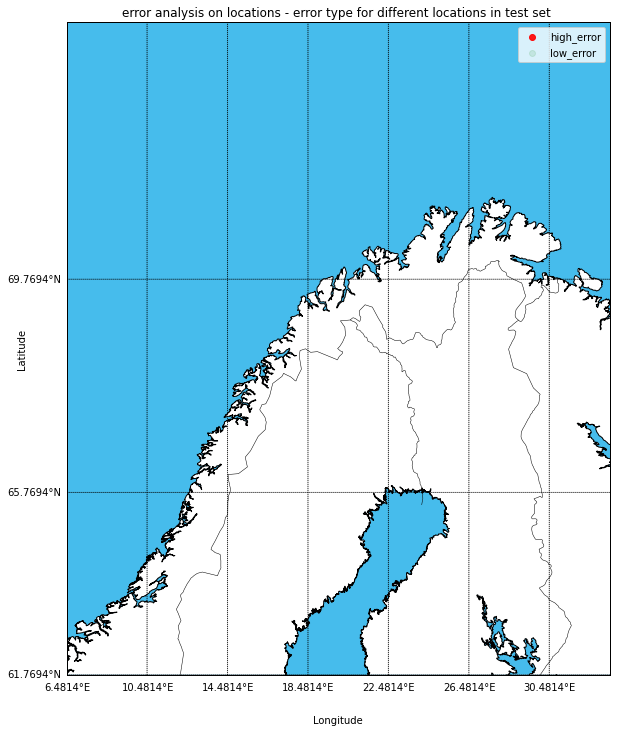

In [222]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m2(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m2(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error', alpha = 0.9)
# plot points as green dots - low_error points
m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error', alpha = 0.1)

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

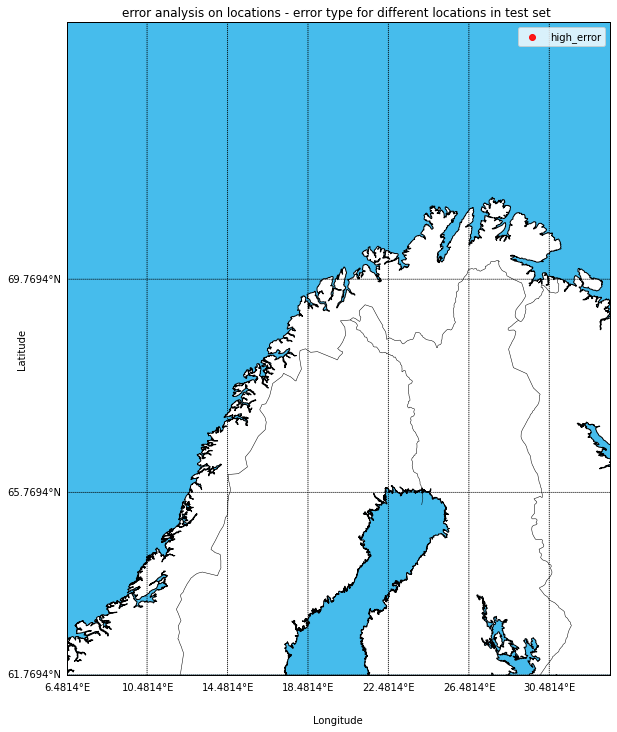

In [223]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m2(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m2(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error', alpha = 0.9)
# plot points as green dots - low_error points
#m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error', alpha = 0.1)

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

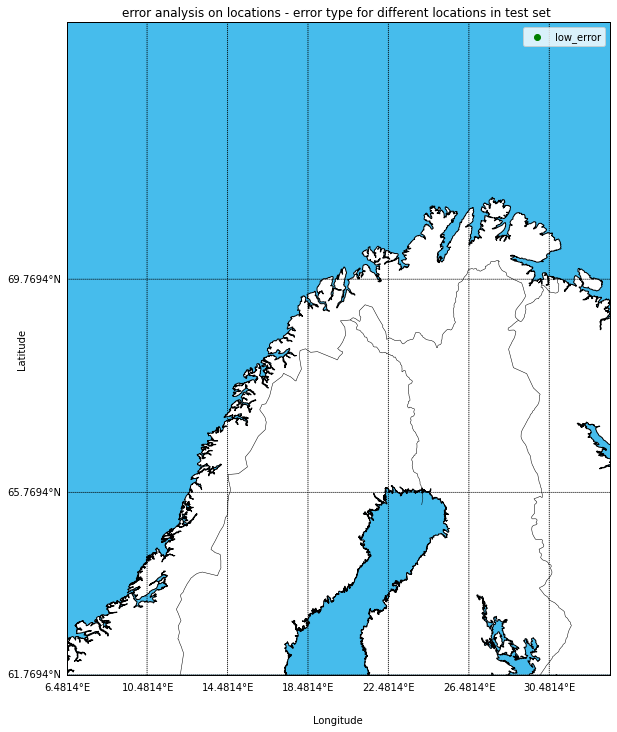

In [224]:
# create map using BASEMAP
plt.figure(figsize=(12,12))
m3 = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m3.drawcoastlines()
m3.drawcountries()
m3.drawstates()
m3.drawmapboundary(fill_color='#46bcec')
m3.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons_low_error, lats_low_error = m2(lon_low_error, lat_low_error)
lons_high_error, lats_high_error = m2(lon_high_error, lat_high_error)


# plot points as red dots - high_error points
#m3.scatter(lons_high_error,lats_high_error, marker = 'o', color='r', zorder=5, label = 'high_error', alpha = 0.9)
# plot points as green dots - low_error points
m3.scatter(lons_low_error, lats_low_error, marker = 'o', color='g', zorder=5, label = 'low_error')

plt.legend()
plt.title("error analysis on locations - error type for different locations in test set ")
#drawing grid lines
m3.drawparallels(np.arange(lat_min,lat_max,4),labels=[1,0,0,0],fontsize=10)
m3.drawmeridians(np.arange(lon_min,lon_max+1,4), labels=[0,0,0,1],fontsize=10)
plt.xlabel('Longitude', labelpad=40, fontsize=10)
plt.ylabel('Latitude', labelpad=40, fontsize=10)
plt.show()

## one problem that some red points are being overlapped by green dots

## month wise error analysis

In [225]:
jan_error = X_test[X_test['month'] == 1]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
jan_error

,error type,counts
0,low_error,12732
1,high_error,8824


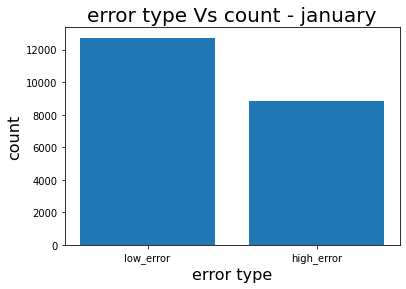

In [226]:
plt.bar(jan_error['error type'], jan_error['counts'])
plt.title("error type Vs count - january", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [227]:
feb_error = X_test[X_test['month'] == 2]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
feb_error

,error type,counts
0,low_error,20071
1,high_error,16407


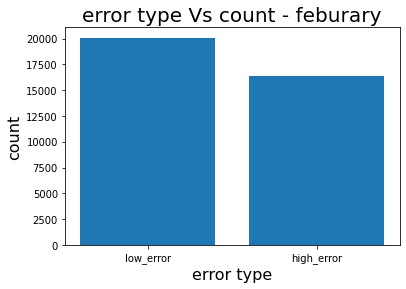

In [228]:
plt.bar(feb_error['error type'], feb_error['counts'])
plt.title("error type Vs count - feburary", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [229]:
mar_error = X_test[X_test['month'] == 3]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
mar_error

,error type,counts
0,high_error,37809
1,low_error,35731


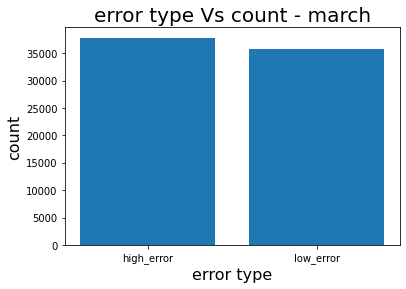

In [230]:
plt.bar(mar_error['error type'], mar_error['counts'])
plt.title("error type Vs count - march", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [231]:
apr_error = X_test[X_test['month'] == 4]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
apr_error

,error type,counts
0,high_error,29565
1,low_error,22527


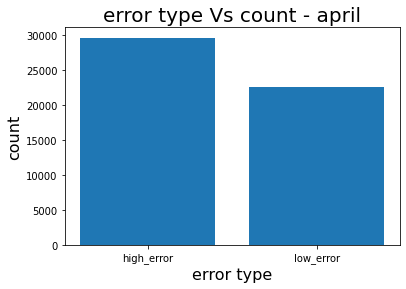

In [232]:
plt.bar(apr_error['error type'], apr_error['counts'])
plt.title("error type Vs count - april", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [233]:
may_error = X_test[X_test['month'] == 5]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
may_error

,error type,counts
0,low_error,13608
1,high_error,11623


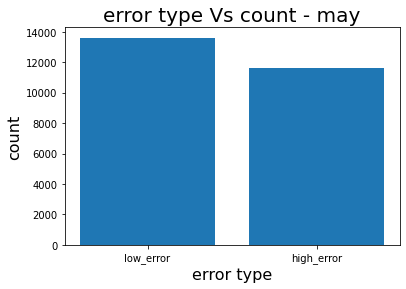

In [234]:
plt.bar(may_error['error type'], may_error['counts'])
plt.title("error type Vs count - may", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [235]:
jun_error = X_test[X_test['month'] == 6]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
jun_error

,error type,counts
0,low_error,11533
1,high_error,7869


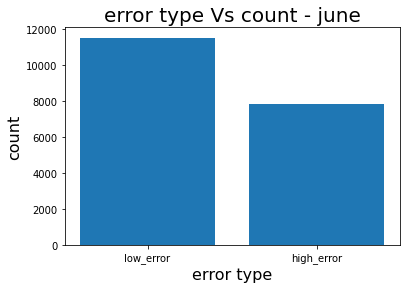

In [236]:
plt.bar(jun_error['error type'], jun_error['counts'])
plt.title("error type Vs count - june", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [237]:
jul_error = X_test[X_test['month'] == 7]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
jul_error

,error type,counts
0,low_error,8109
1,high_error,5840


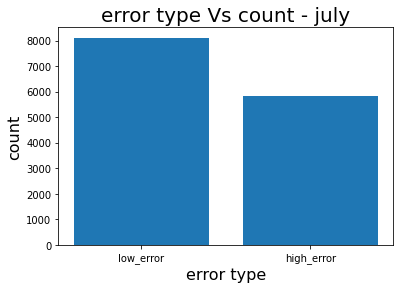

In [238]:
plt.bar(jul_error['error type'], jul_error['counts'])
plt.title("error type Vs count - july", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [239]:
aug_error = X_test[X_test['month'] == 8]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
aug_error

,error type,counts
0,low_error,11204
1,high_error,6631


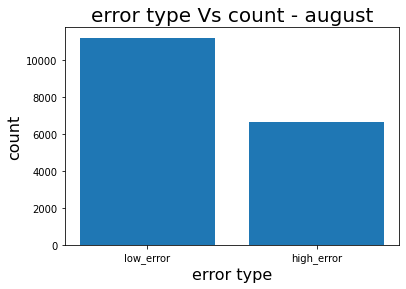

In [240]:
plt.bar(aug_error['error type'], aug_error['counts'])
plt.title("error type Vs count - august", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [241]:
sep_error = X_test[X_test['month'] == 9]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
sep_error

,error type,counts
0,low_error,9685
1,high_error,5639


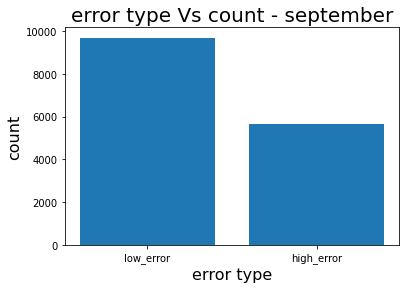

In [242]:
plt.bar(sep_error['error type'], sep_error['counts'])
plt.title("error type Vs count - september", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [243]:
oct_error = X_test[X_test['month'] == 10]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
oct_error

,error type,counts
0,low_error,10064
1,high_error,5976


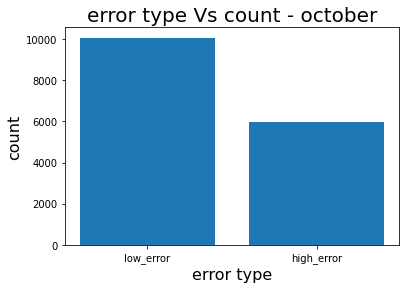

In [244]:
plt.bar(oct_error['error type'], oct_error['counts'])
plt.title("error type Vs count - october", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [245]:
nov_error = X_test[X_test['month'] == 11]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
nov_error

,error type,counts
0,low_error,10207
1,high_error,6327


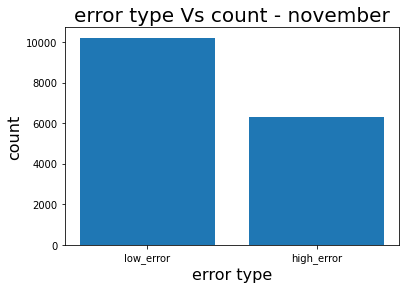

In [246]:
plt.bar(nov_error['error type'], nov_error['counts'])
plt.title("error type Vs count - november", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [247]:
dec_error = X_test[X_test['month'] == 12]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')
dec_error

,error type,counts
0,low_error,6942
1,high_error,5833


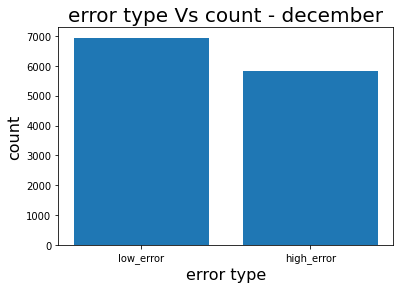

In [248]:
plt.bar(dec_error['error type'], dec_error['counts'])
plt.title("error type Vs count - december", fontsize = 20)
plt.xlabel('error type', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()

In [249]:
list_months = [1,2,3,4,5,6,7,8,9,10,11,12]

In [250]:
high_error_month_frequency = []
for i in list_months:
  high_error_month_frequency.append(len(X_test[X_test['month'] == i][X_test['error_type'] == 'high_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [251]:
 high_error_month_frequency

[8824, 16407, 37809, 29565, 11623, 7869, 5840, 6631, 5639, 5976, 6327, 5833]

In [252]:
distribution_high_error = {'month':['jan', 'feb', 'mar','april' ,'may','jun','jul','aug','sep','oct','nov','dec'],
        'high_error_count': high_error_month_frequency}
  
# Create DataFrame
df_monthly_high_error = pd.DataFrame(distribution_high_error)
df_monthly_high_error

,month,high_error_count
0,jan,8824
1,feb,16407
2,mar,37809
3,april,29565
4,may,11623
5,jun,7869
6,jul,5840
7,aug,6631
8,sep,5639
9,oct,5976


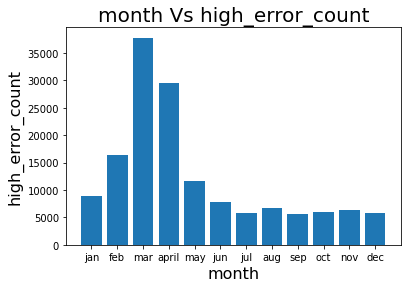

In [253]:
plt.bar(df_monthly_high_error['month'], df_monthly_high_error['high_error_count'])
plt.title("month Vs high_error_count", fontsize = 20)
plt.xlabel('month', fontsize=16)
plt.ylabel('high_error_count', fontsize=16)
plt.show()

In [254]:
low_error_month_frequency = []
for i in list_months:
  low_error_month_frequency.append(len(X_test[X_test['month'] == i][X_test['error_type'] == 'low_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [255]:
 low_error_month_frequency

[12732,
 20071,
 35731,
 22527,
 13608,
 11533,
 8109,
 11204,
 9685,
 10064,
 10207,
 6942]

In [256]:
distribution_low_error = {'month':['jan', 'feb', 'mar','april' ,'may','jun','jul','aug','sep','oct','nov','dec'],
        'low_error_count': low_error_month_frequency}
  
# Create DataFrame
df_monthly_low_error = pd.DataFrame(distribution_low_error)
df_monthly_low_error

,month,low_error_count
0,jan,12732
1,feb,20071
2,mar,35731
3,april,22527
4,may,13608
5,jun,11533
6,jul,8109
7,aug,11204
8,sep,9685
9,oct,10064


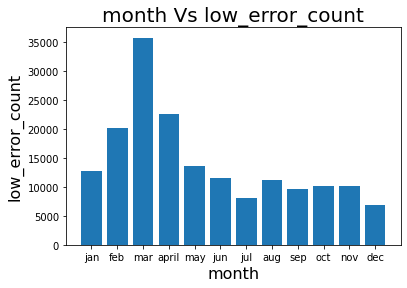

In [257]:
plt.bar(df_monthly_low_error['month'], df_monthly_low_error['low_error_count'])
plt.title("month Vs low_error_count", fontsize = 20)
plt.xlabel('month', fontsize=16)
plt.ylabel('low_error_count', fontsize=16)
plt.show()

## gear code wise error analysis

In [258]:
list_gear_codes = X_test['Redskap (kode)'].unique()

In [259]:
list_gear_codes

array([22., 33., 32., 31., 20., 61., 30., 42., 41., 21., 34., 55.])

In [260]:
high_error_gears_frequency = []
for i in list_gear_codes:
  high_error_gears_frequency.append(len(X_test[X_test['Redskap (kode)'] == i][X_test['error_type'] == 'high_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [261]:
high_error_gears_frequency

[49698, 77019, 10779, 9830, 529, 232, 182, 34, 12, 5, 22, 1]

In [262]:
distribution_high_error_gears = {'gear_code':list_gear_codes,
        'high_error_count': high_error_gears_frequency}
  
# Create DataFrame
df_gear_high_error = pd.DataFrame(distribution_high_error_gears)
df_gear_high_error

,gear_code,high_error_count
0,22.0,49698
1,33.0,77019
2,32.0,10779
3,31.0,9830
4,20.0,529
5,61.0,232
6,30.0,182
7,42.0,34
8,41.0,12
9,21.0,5


## 33 and 22 are the gear codes in which highest no of high errors were recorded.

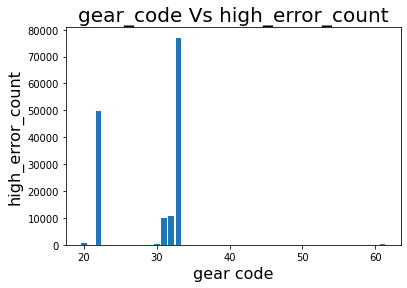

In [263]:
plt.bar(df_gear_high_error['gear_code'], df_gear_high_error['high_error_count'])
plt.title("gear_code Vs high_error_count", fontsize = 20)
plt.xlabel('gear code', fontsize=16)
plt.ylabel('high_error_count', fontsize=16)
plt.show()

In [264]:
low_error_gears_frequency = []
for i in list_gear_codes:
  low_error_gears_frequency.append(len(X_test[X_test['Redskap (kode)'] == i][X_test['error_type'] == 'low_error']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

In [265]:
low_error_gears_frequency

[68137, 80704, 10668, 11021, 1512, 134, 127, 78, 14, 3, 15, 0]

In [266]:
distribution_low_error_gears = {'gear_code':list_gear_codes,
        'low_error_count': low_error_gears_frequency}
  
# Create DataFrame
df_gear_low_error = pd.DataFrame(distribution_low_error_gears)
df_gear_low_error

,gear_code,low_error_count
0,22.0,68137
1,33.0,80704
2,32.0,10668
3,31.0,11021
4,20.0,1512
5,61.0,134
6,30.0,127
7,42.0,78
8,41.0,14
9,21.0,3


## again 33 and 22 are the gear codes where maximum no of low errors were recorded

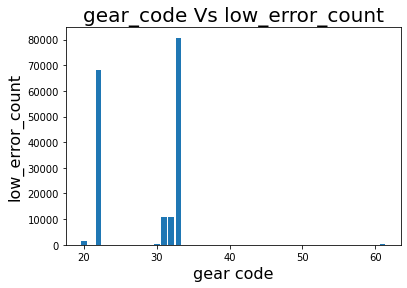

In [267]:
plt.bar(df_gear_low_error['gear_code'], df_gear_low_error['low_error_count'])
plt.title("gear_code Vs low_error_count", fontsize = 20)
plt.xlabel('gear code', fontsize=16)
plt.ylabel('low_error_count', fontsize=16)
plt.show()

In [268]:
# X_test[X_test['Redskap (kode)'] == 33]['error_type'].value_counts().rename_axis('error type').reset_index(name='counts')